<a href="https://colab.research.google.com/github/ET-0813/CS-EE/blob/main/CS_ML_Breast_Cancer_EE_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS ML Breast Cancer EE Exploration**

In [1]:
#importing & formatting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

%matplotlib inline
sb.set_style("whitegrid")

In [2]:
#dataset loading

cancer = load_breast_cancer()

df_features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_target = pd.Series(cancer.target, name='target_class')

df_full = pd.concat([df_features, df_target], axis=1)

print("Feature Names:")
print(cancer.feature_names)
print("\nTarget Names (0 and 1 map to):")
print(cancer.target_names)

print("\nTarget Value Counts:")
print(df_target.value_counts())


print("\nFirst 5 rows of the full DataFrame:")
print(df_full.head())

print("\nInformation about the DataFrame:")
df_full.info()

print("\nDescriptive statistics of the features:")
print(df_features.describe())

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names (0 and 1 map to):
['malignant' 'benign']

Target Value Counts:
target_class
1    357
0    212
Name: count, dtype: int64

First 5 rows of the full DataFrame:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25   


Full Correlation Matrix (Features):
                         mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
mean radius                    1.000         0.324           0.998      0.987            0.171             0.506           0.677                0.823          0.148              -3.116e-01     6.791e-01         -0.097            0.674       0.736            -0.223              0.206            0.194                 0.376          -0.104                   -0.043         0.970          0.297            0.965       0.941   

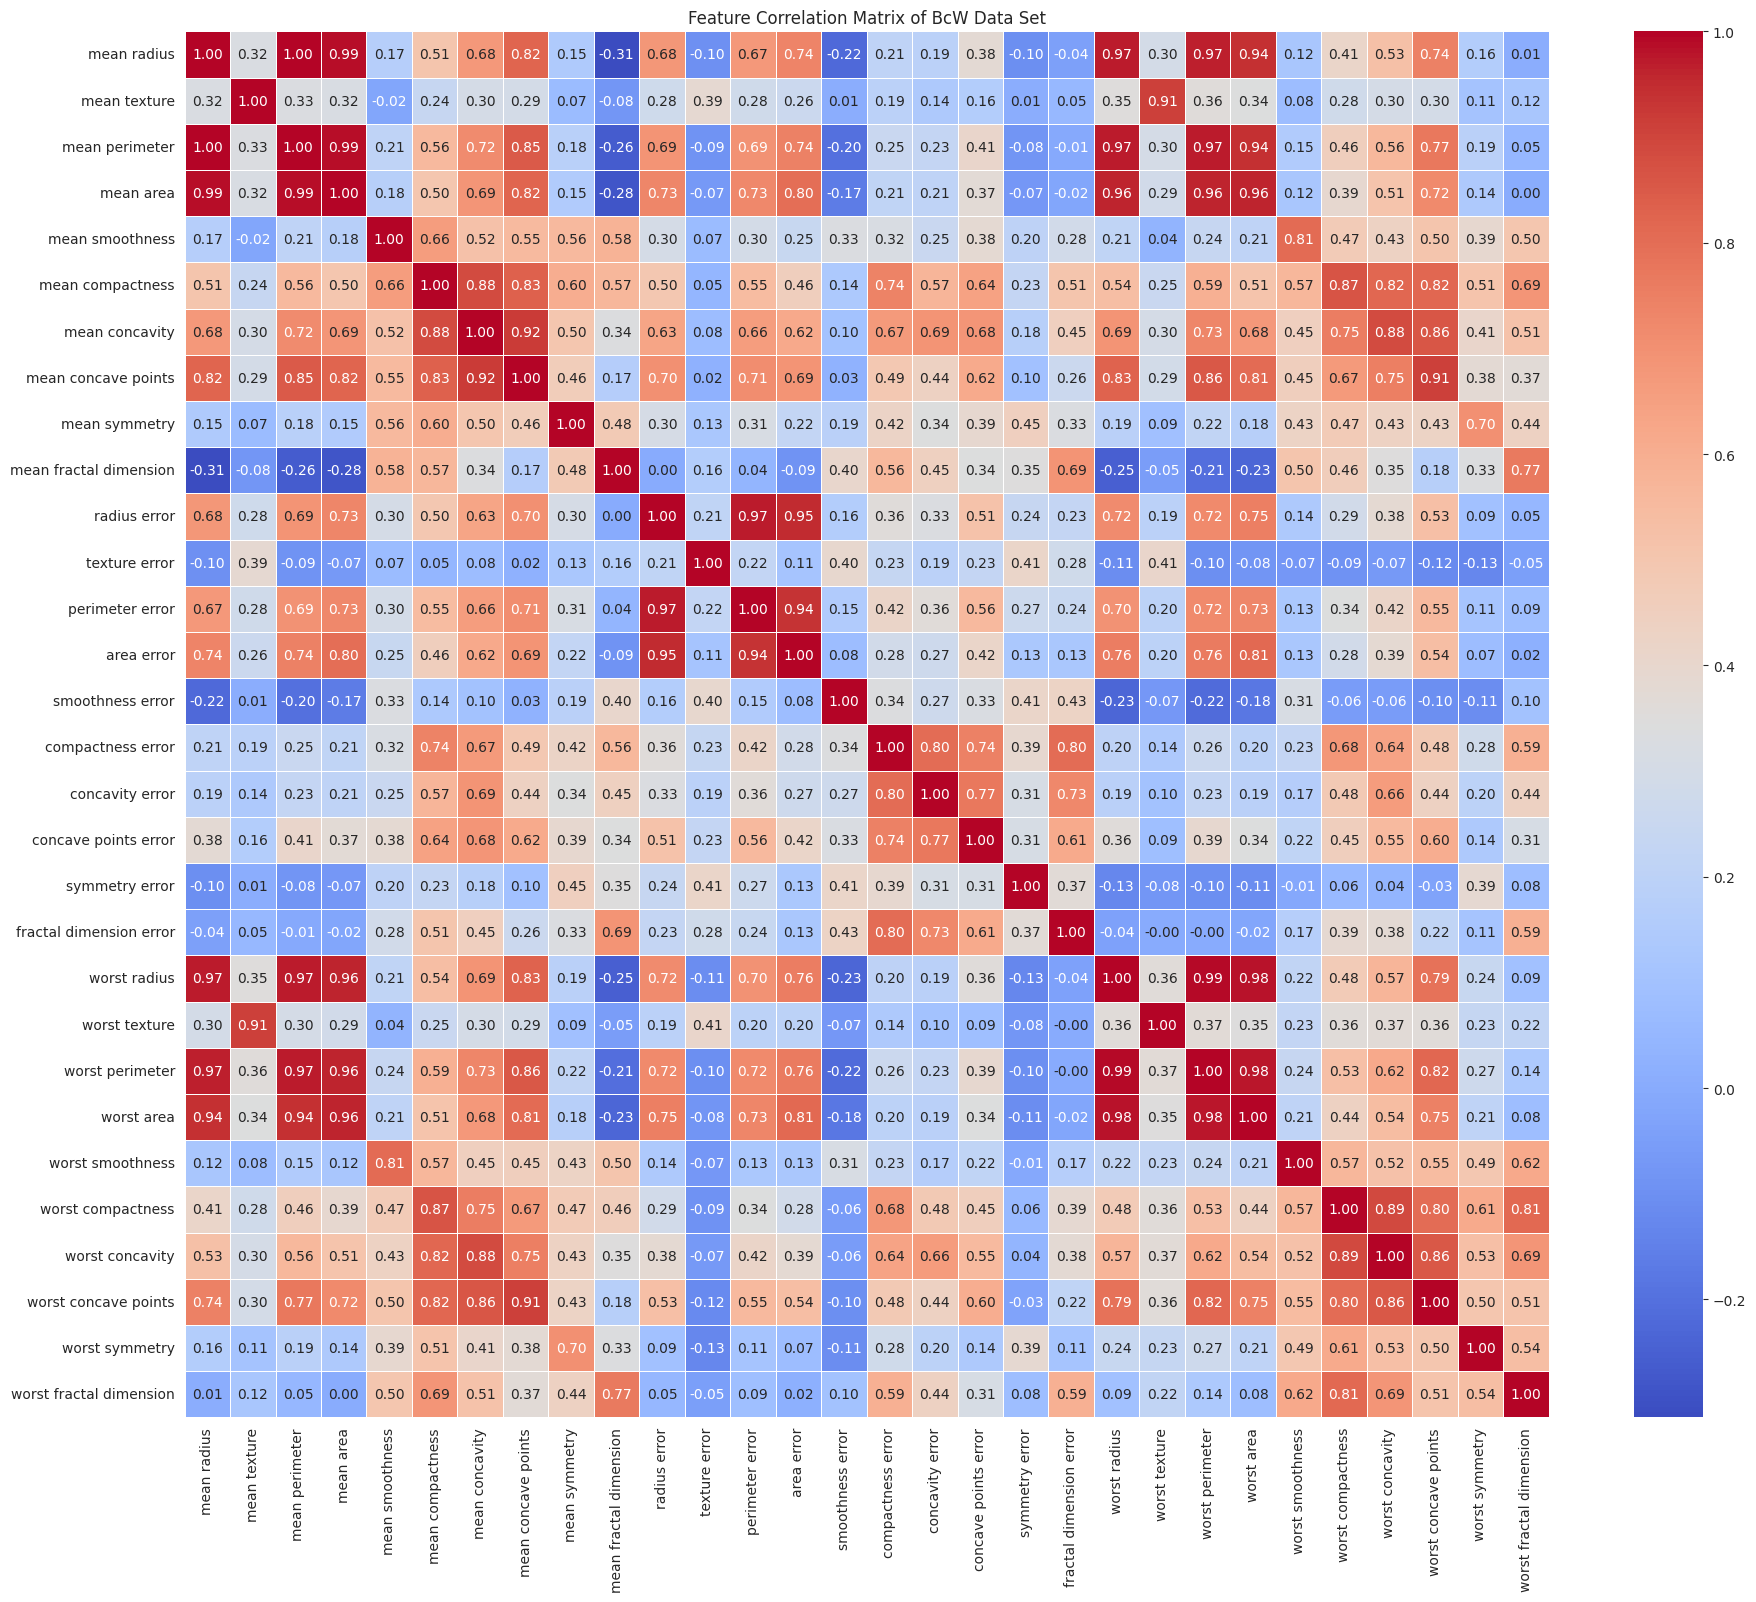

In [3]:
#correlation matrix

correlation_matrix = df_features.corr()

plt.figure(figsize=(22,18))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Feature Correlation Matrix of BcW Data Set")


#Below is AI Generated!!!
# Temporarily set Pandas display options to show all rows and columns
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3, # Display numbers with 3 decimal places
                       'display.width', 1000):  # Adjust width for your screen if needed
    print("\nFull Correlation Matrix (Features):")
    print(correlation_matrix)


In [4]:
#seperating features and target

X = cancer.data
Y = cancer.target

In [5]:
#splitting training & testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (398, 30)
Shape of X_test: (171, 30)
Shape of y_train: (398,)
Shape of y_test: (171,)


In [6]:
#scaling data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Finding optimal K for KNN using 5-fold Cross-Validation on F1-score...
K=1, Mean CV F1-score: 0.9395, Max CV F1-score:0.9497, Min CV F1-score:0.9245
K=3, Mean CV F1-score: 0.9672, Max CV F1-score:0.9875, Min CV F1-score:0.9373
K=5, Mean CV F1-score: 0.9647, Max CV F1-score:0.9748, Min CV F1-score:0.9496
K=7, Mean CV F1-score: 0.9521, Max CV F1-score:0.9621, Min CV F1-score:0.9373
K=9, Mean CV F1-score: 0.9572, Max CV F1-score:0.9748, Min CV F1-score:0.9373
K=11, Mean CV F1-score: 0.9621, Max CV F1-score:0.9875, Min CV F1-score:0.9494
K=13, Mean CV F1-score: 0.9569, Max CV F1-score:0.9875, Min CV F1-score:0.9365
K=15, Mean CV F1-score: 0.9595, Max CV F1-score:0.9875, Min CV F1-score:0.9365
K=17, Mean CV F1-score: 0.9594, Max CV F1-score:0.9875, Min CV F1-score:0.9368
K=19, Mean CV F1-score: 0.9594, Max CV F1-score:0.9875, Min CV F1-score:0.9490
K=21, Mean CV F1-score: 0.9518, Max CV F1-score:0.9748, Min CV F1-score:0.9234
K=23, Mean CV F1-score: 0.9568, Max CV F1-score:0.9875, Min CV F1

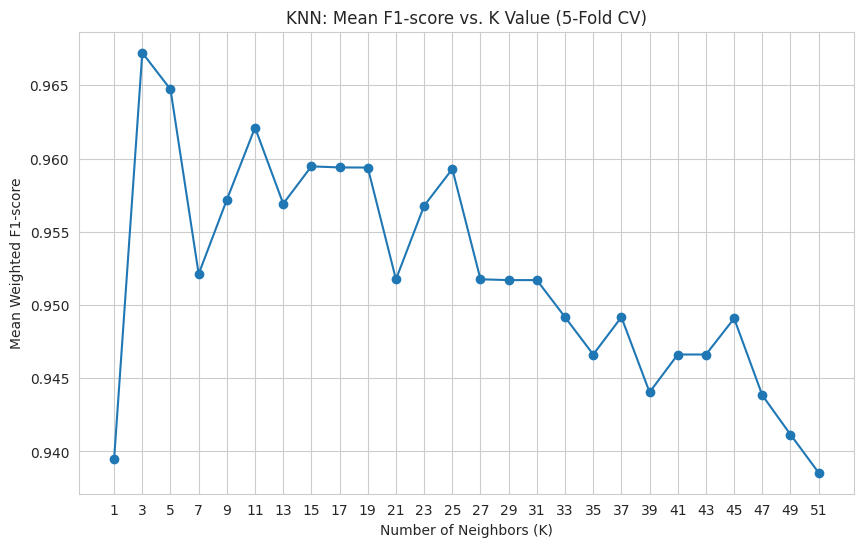

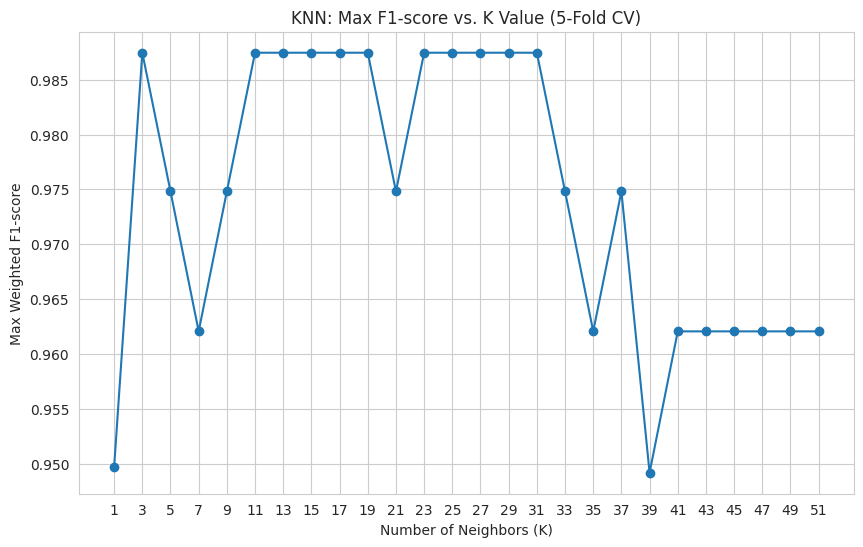

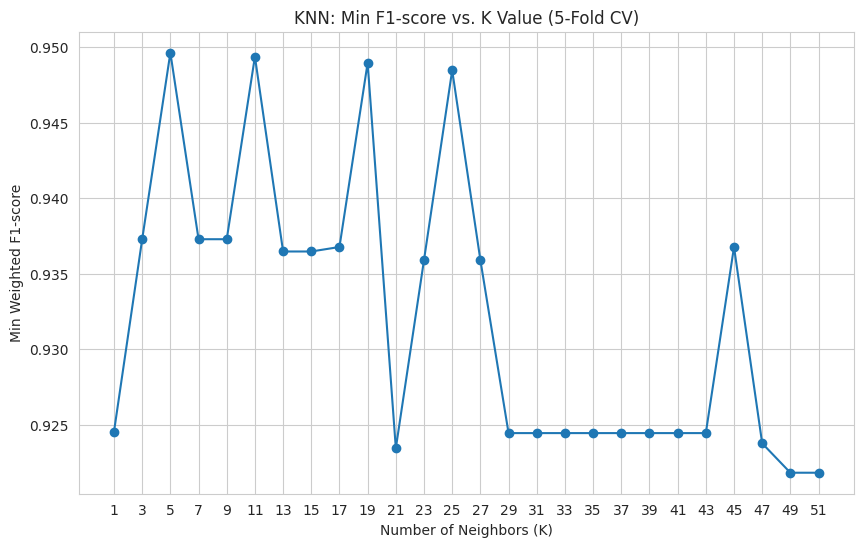

In [7]:
#hyperparameter testing for KNN

k_values = [i for i in range(1, 52) if i % 2 != 0] # Odd K values from 1 to 25
cv_scores_f1 = []
max_cv_scores_f1 = []
min_cv_scores_f1 = []
print("Finding optimal K for KNN using 5-fold Cross-Validation on F1-score...")

for k in k_values:
  knn_temp = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='minkowski')
  scores = cross_val_score(knn_temp, X_train_scaled, Y_train, cv=5, scoring='f1_weighted')
  cv_scores_f1.append(scores.mean())
  max_cv_scores_f1.append(max(scores))
  min_cv_scores_f1.append(min(scores))
  print(f"K={k}, Mean CV F1-score: {scores.mean():.4f}, Max CV F1-score:{max(scores):.4f}, Min CV F1-score:{min(scores):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_f1, marker='o', linestyle='-')
plt.title("KNN: Mean F1-score vs. K Value (5-Fold CV)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Weighted F1-score")
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, max_cv_scores_f1, marker='o', linestyle='-')
plt.title("KNN: Max F1-score vs. K Value (5-Fold CV)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Max Weighted F1-score")
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, min_cv_scores_f1, marker='o', linestyle='-')
plt.title("KNN: Min F1-score vs. K Value (5-Fold CV)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Min Weighted F1-score")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [8]:
#setting 'K' based on testing

#Looking at the graph, k= 3, 5, 11 are the main contenders

'''
Justification for K=5:

"A range of odd K values from 1 to 51 was evaluated for the K-Nearest Neighbors
classifier using 5-fold cross-validation on the scaled training data, with the
weighted F1-score as the performance metric. While K=3 yielded the highest mean
F1-score (0.9672), it also exhibited the largest variance across the folds
(Min F1=0.9373, Max F1=0.9875). K=5 achieved a very competitive mean F1-score of
0.9647, only marginally lower than K=3. Crucially, K=5 demonstrated greater
stability with a significantly higher minimum F1-score across the folds (0.9496)
and a lower overall variance (Max-Min range of 0.0252 compared to 0.0502 for K=3).
Given the desire for a model that is both accurate and robust
(i.e., performs consistently well across different subsets of data), K=5 was
selected as the optimal number of neighbors. This choice prioritizes a slightly
more stable and reliable performance profile while maintaining a high average
F1-score."

Why not K=3?

While K=3 has the highest average, the wider spread in its scores (meaning it
performed worse on at least one fold compared to K=5's worst fold) suggests it
might be slightly more prone to overfitting the specific characteristics of
certain training data subsets. A slightly larger K, like K=5, often provides a
bit more generalization by smoothing out the decision boundary.

Why not K=11?

K=11 has a good mean, but its minimum is similar to K=5, and its variance is
higher than K=5. K=5 offers a slightly better package of high mean and good
stability.
'''

NEIGH = 5

In [9]:
#random forest hyperparameter setting (sticking to defaults)

RF_Trees = 100
RF_Depth = None
RF_Features = 'sqrt'
RF_RANDOM_STATE = 42


print("\nRandom Forest Hyperparameters:")
print(f"  n_estimators: {RF_Trees}")
print(f"  max_depth: {RF_Depth}")
print(f"  max_features: {RF_Features}")
print(f"  random_state: {RF_RANDOM_STATE}")


Random Forest Hyperparameters:
  n_estimators: 100
  max_depth: None
  max_features: sqrt
  random_state: 42



--- KNN Baseline (No PCA) ---
KNN Baseline Training Time: 0.001173
KNN Baseline Prediction Time: 0.001699 seconds
KNN Baseline F1-score (Weighted): 0.9585
KNN Baseline Accuracy: 0.9591

KNN Baseline Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.89      0.94        64
      benign       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


KNN Baseline Confusion Matrix:


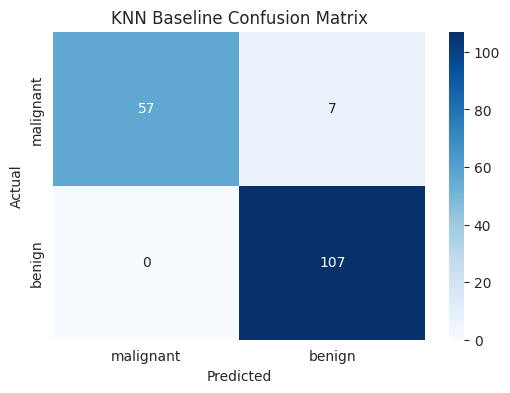

In [10]:
#baseline KNN testing

print("\n--- KNN Baseline (No PCA) ---")
knn_baseline = KNeighborsClassifier(n_neighbors=NEIGH, weights='uniform', metric='minkowski')

#training
start_train_knn_baseline = time.perf_counter()
knn_baseline.fit(X_train_scaled, Y_train)
end_train_knn_baseline = time.perf_counter()

train_time_knn_baseline = end_train_knn_baseline - start_train_knn_baseline
print(f"KNN Baseline Training Time: {train_time_knn_baseline:.6f}")

#predicting
start_predict_knn_baseline = time.perf_counter()
y_pred_knn_baseline = knn_baseline.predict(X_test_scaled)
end_predict_knn_baseline = time.perf_counter()

predict_time_knn_baseline = end_predict_knn_baseline - start_predict_knn_baseline
print(f"KNN Baseline Prediction Time: {predict_time_knn_baseline:.6f} seconds")

#evaluation
f1_knn_baseline = f1_score(Y_test, y_pred_knn_baseline, average='weighted')
acc_knn_baseline = accuracy_score(Y_test, y_pred_knn_baseline)
print(f"KNN Baseline F1-score (Weighted): {f1_knn_baseline:.4f}")
print(f"KNN Baseline Accuracy: {acc_knn_baseline:.4f}")

print("\nKNN Baseline Classification Report:")
print(classification_report(Y_test, y_pred_knn_baseline, target_names=cancer.target_names))

#confusion matrix
print("\nKNN Baseline Confusion Matrix:")
plt.figure(figsize=(6,4))
cm_knn_baseline = confusion_matrix(Y_test, y_pred_knn_baseline)
sb.heatmap(cm_knn_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Baseline Confusion Matrix')
plt.show()


--- Random Forest Baseline (No PCA) ---
RF Baseline Training Time: 0.522148 seconds
RF Baseline Prediction Time: 0.011865 seconds
RF Baseline F1-score (Weighted): 0.9356
RF Baseline Accuracy: 0.9357

RF Baseline Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


RF Baseline Confusion Matrix:


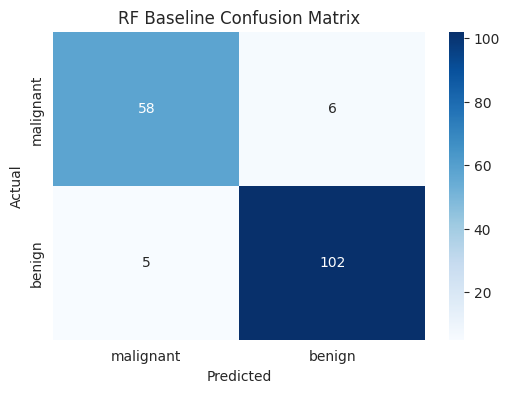

In [11]:
#random forest baseline testing

print("\n--- Random Forest Baseline (No PCA) ---")
rf_baseline = RandomForestClassifier(
    n_estimators=RF_Trees,
    max_depth=RF_Depth,
    max_features=RF_Features,
    random_state=RF_RANDOM_STATE
)

#training
start_train_rf_baseline = time.perf_counter()
rf_baseline.fit(X_train_scaled, Y_train)
end_train_rf_baseline = time.perf_counter()
train_time_rf_baseline = end_train_rf_baseline - start_train_rf_baseline
print(f"RF Baseline Training Time: {train_time_rf_baseline:.6f} seconds")

#predicting
start_predict_rf_baseline = time.perf_counter()
y_pred_rf_baseline = rf_baseline.predict(X_test_scaled)
end_predict_rf_baseline = time.perf_counter() #
predict_time_rf_baseline = end_predict_rf_baseline - start_predict_rf_baseline
print(f"RF Baseline Prediction Time: {predict_time_rf_baseline:.6f} seconds")

#evaluation
f1_rf_baseline = f1_score(Y_test, y_pred_rf_baseline, average='weighted')
acc_rf_baseline = accuracy_score(Y_test, y_pred_rf_baseline)
print(f"RF Baseline F1-score (Weighted): {f1_rf_baseline:.4f}")
print(f"RF Baseline Accuracy: {acc_rf_baseline:.4f}")

print("\nRF Baseline Classification Report:")
print(classification_report(Y_test, y_pred_rf_baseline, target_names=cancer.target_names))

print("\nRF Baseline Confusion Matrix:")
plt.figure(figsize=(6,4))
cm_rf_baseline = confusion_matrix(Y_test, y_pred_rf_baseline)
sb.heatmap(cm_rf_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Baseline Confusion Matrix')
plt.show()



--- Exploring Full PCA Output ---
Number of principal components found: 30

Explained variance ratio for each component:
PC1: 0.4516 (45.16%)
PC2: 0.1963 (19.63%)
PC3: 0.0890 (8.90%)
PC4: 0.0660 (6.60%)
PC5: 0.0554 (5.54%)
PC6: 0.0400 (4.00%)
PC7: 0.0207 (2.07%)
PC8: 0.0151 (1.51%)
PC9: 0.0117 (1.17%)
PC10: 0.0104 (1.04%)
PC11: 0.0086 (0.86%)
PC12: 0.0086 (0.86%)
PC13: 0.0070 (0.70%)
PC14: 0.0050 (0.50%)
PC15: 0.0028 (0.28%)
PC16: 0.0024 (0.24%)
PC17: 0.0019 (0.19%)
PC18: 0.0017 (0.17%)
PC19: 0.0011 (0.11%)
PC20: 0.0010 (0.10%)
PC21: 0.0009 (0.09%)
PC22: 0.0008 (0.08%)
PC23: 0.0006 (0.06%)
PC24: 0.0005 (0.05%)
PC25: 0.0004 (0.04%)
PC26: 0.0002 (0.02%)
PC27: 0.0002 (0.02%)
PC28: 0.0001 (0.01%)
PC29: 0.0000 (0.00%)
PC30: 0.0000 (0.00%)

Cumulative explained variance:
 Up to PC1: 0.4516 (45.16%)
 Up to PC2: 0.6478 (64.78%)
 Up to PC3: 0.7368 (73.68%)
 Up to PC4: 0.8028 (80.28%)
 Up to PC5: 0.8582 (85.82%)
 Up to PC6: 0.8982 (89.82%)
 Up to PC7: 0.9189 (91.89%)
 Up to PC8: 0.9341 (93.41%)

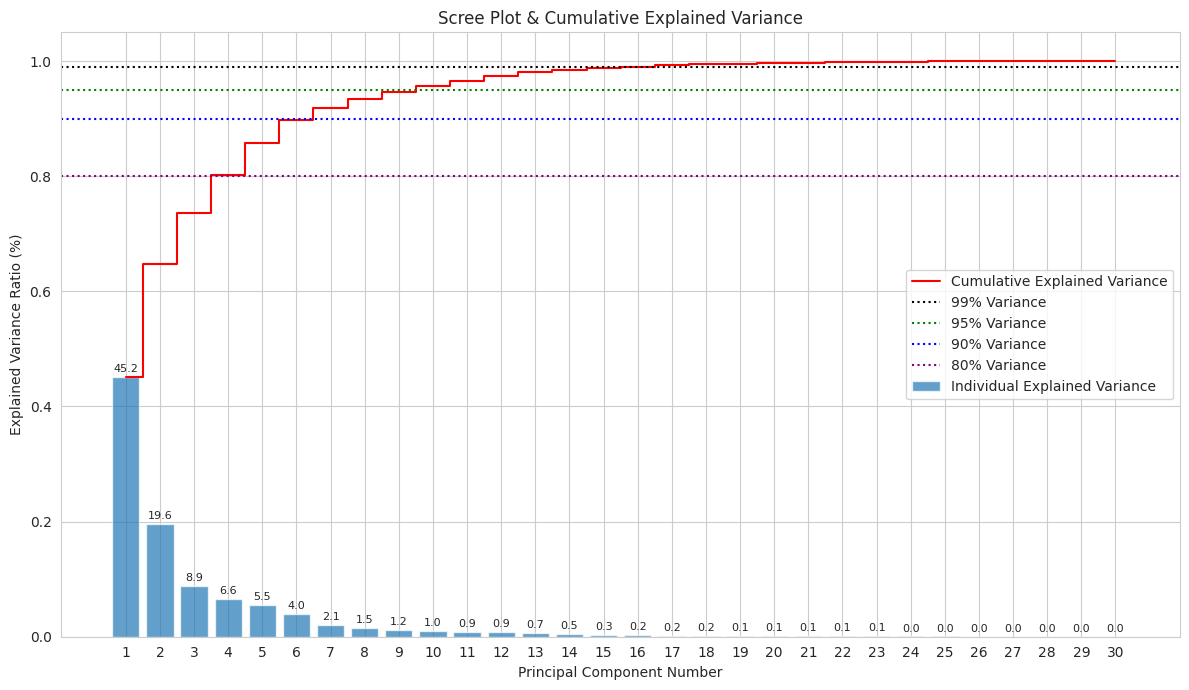


--- Loadings for PC1 ---
Explained Variance by PC1: 0.4516
mean concave points     0.259088
mean concavity          0.253645
worst concave points    0.250057
mean compactness        0.239204
worst perimeter         0.235089
worst concavity         0.230362
worst radius            0.226717
mean perimeter          0.225343
worst area              0.223272
mean area               0.219624
dtype: float64

--- Loadings for PC2 ---
Explained Variance by PC2: 0.1963
mean fractal dimension     0.361301
fractal dimension error    0.279409
worst fractal dimension    0.268941
compactness error          0.235564
mean radius                0.232248
mean area                  0.226519
worst radius               0.219473
worst area                 0.216428
mean perimeter             0.213421
smoothness error           0.209330
dtype: float64

--- Loadings for PC3 ---
Explained Variance by PC3: 0.0890
texture error              0.429956
worst smoothness           0.292696
smoothness error           0

In [12]:
#playing w/ PCA & finding components

'''
Experimenting with a PCA for all of the data to find the principal components and
seeing their variance, in order to slowly remove the smallest variance components
until only PC1 is kept, to experiment on its effects on KNN & RF.
'''

print("\n--- Exploring Full PCA Output ---")

#instantiating PCA to find components
pca_full_analysis = PCA(random_state=42)

#fitting PCA on the training data
pca_full_analysis.fit(X_train_scaled)

explained_variance_ratios = pca_full_analysis.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratios)

num_components_found = pca_full_analysis.n_components_
print(f"Number of principal components found: {num_components_found}")

print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratios):
  print(f"PC{i+1}: {ratio:.4f} ({(ratio*100):.2f}%)")

print("\nCumulative explained variance:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
  print(f" Up to PC{i+1}: {cum_ratio:.4f} ({(cum_ratio*100):.2f}%)")

#visualization on scree plot
plt.figure(figsize=(12,7))
bars = plt.bar(range(1,len(explained_variance_ratios)+1), explained_variance_ratios, alpha=0.7, align='center', label='Individual Explained Variance')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.1f}',ha='center', va='bottom', fontsize=8, rotation=0)
plt.step(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.ylabel('Explained Variance Ratio (%)')
plt.xlabel('Principal Component Number')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.ylim(0, 1.05)
plt.axhline(y=0.99, color='black', linestyle=':', label='99% Variance')
plt.axhline(y=0.95, color='g', linestyle=':', label='95% Variance')
plt.axhline(y=0.90, color='b', linestyle=':', label='90% Variance')
plt.axhline(y=0.80, color='purple', linestyle=':', label='80% Variance')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

#analyzing the loadings in PC1,2,3
pc1_loadings = pca_full_analysis.components_[0]
pc2_loadings = pca_full_analysis.components_[1]
pc3_loadings = pca_full_analysis.components_[2]

loadings_pc1_series = pd.Series(pc1_loadings, index=cancer.feature_names)
loadings_pc2_series = pd.Series(pc2_loadings, index=cancer.feature_names)
loadings_pc3_series = pd.Series(pc3_loadings, index=cancer.feature_names)

print("\n--- Loadings for PC1 ---")
print(f"Explained Variance by PC1: {explained_variance_ratios[0]:.4f}")
print(loadings_pc1_series.abs().sort_values(ascending=False).head(10))
print("\n--- Loadings for PC2 ---")
print(f"Explained Variance by PC2: {explained_variance_ratios[1]:.4f}")
print(loadings_pc2_series.abs().sort_values(ascending=False).head(10))
print("\n--- Loadings for PC3 ---")
print(f"Explained Variance by PC3: {explained_variance_ratios[2]:.4f}")
print(loadings_pc3_series.abs().sort_values(ascending=False).head(10))

In [13]:
#testing different # of top PCs from 0 to 30

'''
Since the 16th PC is just over 99%, I will test k=1 to k=16 for the PCs to
include. This will show the small changes and details for each K value up to 16.
Afterwards, I will test every third k value: 19, 22, 25, 28. This is because
those values of K only bring marginal changes to the variance. PC30 would be
just a rotation as the original data has 30 dimensions, and PC29 is negligible
since it is also 0.0000 variance.
'''

results_list = []
num_original_features = X_train_scaled.shape[1]

#baseline test rerun

print("\n---Starting Baseline Testing with no PCA---")

print("\n Training KNN Baseline...")

knn_baseline = KNeighborsClassifier(
    n_neighbors=NEIGH,
    weights='uniform',
    metric='minkowski')

start_time = time.perf_counter()
knn_baseline.fit(X_train_scaled, Y_train)
train_time_knn_baseline = time.perf_counter() - start_time

print("\n Predicting with KNN Baseline...")
start_time = time.perf_counter()
y_pred_knn_baseline = knn_baseline.predict(X_test_scaled)
predict_time_knn_baseline = time.perf_counter() - start_time

f1_knn_baseline = f1_score(
    Y_test,
    y_pred_knn_baseline,
    average='weighted')

acc_knn_baseline = accuracy_score(Y_test, y_pred_knn_baseline)

#(AI helped take the confusion matrix into values)
cm_knn_baseline = confusion_matrix(Y_test, y_pred_knn_baseline)
if cm_knn_baseline.size == 4:
    tn_knn_b, fp_knn_b, fn_knn_b, tp_knn_b = cm_knn_baseline.ravel()
else:
    tn_knn_b = cm_knn_baseline[0,0] if cm_knn_baseline.shape[0] > 0 and cm_knn_baseline.shape[1] > 0 else 0
    fp_knn_b = cm_knn_baseline[0,1] if cm_knn_baseline.shape[0] > 0 and cm_knn_baseline.shape[1] > 1 else 0
    fn_knn_b = cm_knn_baseline[1,0] if cm_knn_baseline.shape[0] > 1 and cm_knn_baseline.shape[1] > 0 else 0
    tp_knn_b = cm_knn_baseline[1,1] if cm_knn_baseline.shape[0] > 1 and cm_knn_baseline.shape[1] > 1 else 0

total_time_knn_baseline = train_time_knn_baseline + predict_time_knn_baseline

results_list.append({
    'Experiment_Type': 'Baseline_No_PCA',
    'Num_PCs_Targeted': num_original_features,
    'Num_PCs_Actual': num_original_features,
    'Variance_Explained': 1.0,
    'Classifier': 'KNN',
    'F1_Score_Weighted': f1_knn_baseline,
    'Accuracy': acc_knn_baseline,
    'FP': fp_knn_b,
    'FN': fn_knn_b,
    'TP': tp_knn_b,
    'TN': tn_knn_b,
    'Total_Time_s': total_time_knn_baseline,
    'Training_Time_s': train_time_knn_baseline,
    'Prediction_Time_s': predict_time_knn_baseline,
    'PCA_Fit_Time_s': 0
})
print(f"\n  KNN Baseline: F1={f1_knn_baseline:.6f}, Acc={acc_knn_baseline:.6f}, TrainTime={train_time_knn_baseline:.6f}s, PredTime={predict_time_knn_baseline:.6f}s")

#RF baseline training
print("\n Training Random Forest Baseline...")
rf_baseline = RandomForestClassifier(
    n_estimators=RF_Trees,
    max_depth=RF_Depth,
    max_features=RF_Features,
    random_state=RF_RANDOM_STATE
)
start_time = time.perf_counter()
rf_baseline.fit(X_train_scaled, Y_train)
train_time_rf_baseline = time.perf_counter() - start_time

#RF baseline predicting
print("\n Predicting with Random Forest Baseline...")
start_time = time.perf_counter()
y_pred_rf_baseline = rf_baseline.predict(X_test_scaled)
predict_time_rf_baseline = time.perf_counter() - start_time

#F1, accuracy, recording data
f1_rf_baseline = f1_score(
    Y_test,
    y_pred_rf_baseline,
    average='weighted')

#(AI helped take the confusion matrix into values)
cm_rf_baseline = confusion_matrix(Y_test, y_pred_rf_baseline)
if cm_rf_baseline.size == 4:
    tn_rf_b, fp_rf_b, fn_rf_b, tp_rf_b = cm_rf_baseline.ravel()
else:
    tn_rf_b = cm_rf_baseline[0,0] if cm_rf_baseline.shape[0] > 0 and cm_rf_baseline.shape[1] > 0 else 0
    fp_rf_b = cm_rf_baseline[0,1] if cm_rf_baseline.shape[0] > 0 and cm_rf_baseline.shape[1] > 1 else 0
    fn_rf_b = cm_rf_baseline[1,0] if cm_rf_baseline.shape[0] > 1 and cm_rf_baseline.shape[1] > 0 else 0
    tp_rf_b = cm_rf_baseline[1,1] if cm_rf_baseline.shape[0] > 1 and cm_rf_baseline.shape[1] > 1 else 0

total_time_rf_baseline = train_time_rf_baseline + predict_time_rf_baseline

acc_rf_baseline = accuracy_score(Y_test, y_pred_rf_baseline)
results_list.append({
    'Experiment_Type': 'Baseline_No_PCA',
    'Num_PCs_Targeted': num_original_features,
    'Num_PCs_Actual': num_original_features,
    'Variance_Explained': 1.0,
    'Classifier': 'Random Forest',
    'F1_Score_Weighted': f1_rf_baseline,
    'Accuracy': acc_rf_baseline,
    'FP': fp_rf_b,
    'FN': fn_rf_b,
    'TP': tp_rf_b,
    'TN': tn_rf_b,
    'Total_Time_s': total_time_rf_baseline,
    'Training_Time_s': train_time_rf_baseline,
    'Prediction_Time_s': predict_time_rf_baseline,
    'PCA_Fit_Time_s': 0
})

print(f"\n  RF Baseline: F1={f1_rf_baseline:.6f}, Acc={acc_rf_baseline:.6f}, TrainTime={train_time_rf_baseline:.6f}s, PredTime={predict_time_rf_baseline:.6f}s")

#--------------------------------------------------------
#PCA experiments

#k_values_to_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 22, 25, 28, 30]
#print("\n--- Starting PCA Experiments for k values: 1 to 16, 19, 22, 25, 28, 30 ---")

k_values_to_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
print("\n--- Starting PCA Experiments for k values: 1 to 30 ---")

for k_target in k_values_to_test:
  print(f"\n Running PCA with Target k = {k_target}")
  pca_experiment = PCA(n_components=k_target, random_state=42)
  start_pca_fit_time = time.perf_counter()
  X_train_pca = pca_experiment.fit_transform(X_train_scaled)
  pca_fit_time = time.perf_counter() - start_pca_fit_time
  print(f"    PCA fitting time for PCA {k_target}: {pca_fit_time:.6f} seconds")

  X_test_pca = pca_experiment.transform(X_test_scaled)
  num_pcs = pca_experiment.n_components_
  var_explained = np.sum(pca_experiment.explained_variance_ratio_)
  print(f"    Actual components kept: {num_pcs}, Variance Explained: {var_explained:.6f}")

  #KNN with this PCA

  knn_pca = KNeighborsClassifier(n_neighbors=NEIGH)
  start_time = time.perf_counter()
  knn_pca.fit(X_train_pca, Y_train)
  train_time_knn_pca = time.perf_counter() - start_time

  start_time = time.perf_counter()
  y_pred_knn_pca = knn_pca.predict(X_test_pca)
  predict_time_knn_pca = time.perf_counter() - start_time

  f1_knn_pca = f1_score(Y_test, y_pred_knn_pca, average='weighted')
  acc_knn_pca = accuracy_score(Y_test, y_pred_knn_pca)

  cm_knn_pca = confusion_matrix(Y_test, y_pred_knn_pca)
  if cm_knn_pca.size == 4:
      tn_knn_pca, fp_knn_pca, fn_knn_pca, tp_knn_pca = cm_knn_pca.ravel()
  else:
      tn_knn_pca = cm_knn_pca[0,0] if cm_knn_pca.shape[0] > 0 and cm_knn_pca.shape[1] > 0 else 0
      fp_knn_pca = cm_knn_pca[0,1] if cm_knn_pca.shape[0] > 0 and cm_knn_pca.shape[1] > 1 else 0
      fn_knn_pca = cm_knn_pca[1,0] if cm_knn_pca.shape[0] > 1 and cm_knn_pca.shape[1] > 0 else 0
      tp_knn_pca = cm_knn_pca[1,1] if cm_knn_pca.shape[0] > 1 and cm_knn_pca.shape[1] > 1 else 0

  total_time_knn_pca = train_time_knn_pca + predict_time_knn_pca + pca_fit_time

  results_list.append({
      'Experiment_Type': 'PCA',
      'Num_PCs_Targeted': k_target,
      'Num_PCs_Actual': num_pcs,
      'Variance_Explained': var_explained,
      'Classifier': 'KNN',
      'F1_Score_Weighted': f1_knn_pca,
      'Accuracy': acc_knn_pca,
      'FP': fp_knn_pca,
      'FN': fn_knn_pca,
      'TP': tp_knn_pca,
      'TN': tn_knn_pca,
      'Total_Time_s': total_time_knn_pca,
      'Training_Time_s': train_time_knn_pca,
      'Prediction_Time_s': predict_time_knn_pca,
      'PCA_Fit_Time_s': pca_fit_time
  })

  print(f"      KNN (k={k_target}): F1={f1_knn_pca:.6f}, Acc={acc_knn_pca:.6f}, TrainTime={train_time_knn_pca:.6f}s, PredTime={predict_time_knn_pca:.6f}s")

  #Random Forest with this PCA

  rf_pca = RandomForestClassifier(
      n_estimators=RF_Trees,
      max_depth = RF_Depth,
      max_features = RF_Features,
      random_state = RF_RANDOM_STATE
  )

  start_time = time.perf_counter()
  rf_pca.fit(X_train_pca, Y_train)
  train_time_rf_pca = time.perf_counter() - start_time


  start_time = time.perf_counter()
  y_pred_rf_pca = rf_pca.predict(X_test_pca)
  predict_time_rf_pca = time.perf_counter() - start_time

  f1_rf_pca = f1_score(Y_test, y_pred_rf_pca, average='weighted')
  acc_rf_pca = accuracy_score(Y_test, y_pred_rf_pca)

  cm_rf_pca = confusion_matrix(Y_test, y_pred_rf_pca)
  if cm_rf_pca.size == 4:
      tn_rf_pca, fp_rf_pca, fn_rf_pca, tp_rf_pca = cm_rf_pca.ravel()
  else: # Basic fallback
      tn_rf_pca = cm_rf_pca[0,0] if cm_rf_pca.shape[0] > 0 and cm_rf_pca.shape[1] > 0 else 0
      fp_rf_pca = cm_rf_pca[0,1] if cm_rf_pca.shape[0] > 0 and cm_rf_pca.shape[1] > 1 else 0
      fn_rf_pca = cm_rf_pca[1,0] if cm_rf_pca.shape[0] > 1 and cm_rf_pca.shape[1] > 0 else 0
      tp_rf_pca = cm_rf_pca[1,1] if cm_rf_pca.shape[0] > 1 and cm_rf_pca.shape[1] > 1 else 0

  total_time_rf_pca = train_time_rf_pca + predict_time_rf_pca + pca_fit_time

  results_list.append({
      'Experiment_Type': 'PCA',
      'Num_PCs_Targeted': k_target,
      'Num_PCs_Actual': num_pcs,
      'Variance_Explained': var_explained,
      'Classifier': 'Random Forest',
      'F1_Score_Weighted': f1_rf_pca,
      'Accuracy': acc_rf_pca,
      'FP': fp_rf_pca,
      'FN': fn_rf_pca,
      'TP': tp_rf_pca,
      'TN': tn_rf_pca,
      'Total_Time_s': total_time_rf_pca,
      'Training_Time_s': train_time_rf_pca,
      'Prediction_Time_s': predict_time_rf_pca,
      'PCA_Fit_Time_s': pca_fit_time
  })
  print(f"      RF  (k={k_target}): F1={f1_rf_pca:.6f}, Acc={acc_rf_pca:.6f}, TrainTime={train_time_rf_pca:.6f}s, PredTime={predict_time_rf_pca:.6f}s")


#convert to datafram & save
results_df = pd.DataFrame(results_list)
print("\n\n--- All Experiment Results ---")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(results_df)

#splitting the results for a better comparison (AI help)
knn_results_df = results_df[results_df['Classifier'] == 'KNN'].copy()
rf_results_df = results_df[results_df['Classifier'] == 'Random Forest'].copy()
baseline_knn = knn_results_df[knn_results_df['Experiment_Type'] == 'Baseline_No_PCA']
baseline_rf = rf_results_df[rf_results_df['Experiment_Type'] == 'Baseline_No_PCA']
pca_knn_runs = knn_results_df[knn_results_df['Experiment_Type'] == 'PCA'].sort_values(by='Num_PCs_Actual')
pca_rf_runs = rf_results_df[rf_results_df['Experiment_Type'] == 'PCA'].sort_values(by='Num_PCs_Actual')
knn_results_sorted = pd.concat([pca_knn_runs, baseline_knn]).reset_index(drop=True)
rf_results_sorted = pd.concat([pca_rf_runs, baseline_rf]).reset_index(drop=True)

print("\n--- KNN Results (PCA runs first, Baseline at end) ---")
pd.set_option('display.max_rows', None)
print(knn_results_sorted)
print("\n\n--- Random Forest Results (PCA runs first, Baseline at end) ---")
print(rf_results_sorted)


csv_filename = 'FULL_ee_pca_experiment_results.csv'
results_df.to_csv(csv_filename, index=False)
csv_filename = 'KNN_ee_pca_experiment_results_sorted.csv'
knn_results_sorted.to_csv(csv_filename, index=False)
csv_filename = 'RF_ee_pca_experiment_results_sorted.csv'
rf_results_sorted.to_csv(csv_filename, index=False)




---Starting Baseline Testing with no PCA---

 Training KNN Baseline...

 Predicting with KNN Baseline...

  KNN Baseline: F1=0.958529, Acc=0.959064, TrainTime=0.001360s, PredTime=0.001744s

 Training Random Forest Baseline...

 Predicting with Random Forest Baseline...

  RF Baseline: F1=0.935569, Acc=0.935673, TrainTime=0.312385s, PredTime=0.023642s

--- Starting PCA Experiments for k values: 1 to 30 ---

 Running PCA with Target k = 1
    PCA fitting time for PCA 1: 0.001033 seconds
    Actual components kept: 1, Variance Explained: 0.451562
      KNN (k=1): F1=0.912139, Acc=0.912281, TrainTime=0.000971s, PredTime=0.015566s
      RF  (k=1): F1=0.859649, Acc=0.859649, TrainTime=0.340365s, PredTime=0.012787s

 Running PCA with Target k = 2
    PCA fitting time for PCA 2: 0.002713 seconds
    Actual components kept: 2, Variance Explained: 0.647849
      KNN (k=2): F1=0.941520, Acc=0.941520, TrainTime=0.001013s, PredTime=0.078950s
      RF  (k=2): F1=0.953216, Acc=0.953216, TrainTime=0.

In [14]:
#finding the best

'''
Need to find:

Best Time:
least time overall
least time KNN overall
least time RF overall
least time PCA overall
least time PCA KNN
least time PCA RF


Best F1:
highest F1 overall
highest F1 KNN overall
highest F1 RF overall
highest F1 PCA overall
highest F1 PCA KNN
highest F1 PCA RF

Best Accuracy:
highest overall
highest KNN overall
highest RF overall
highest PCA overall
highest PCA KNN
highest PCA RF

Lowest False Negatives:
least FN overall
least FN KNN overall
least FN RF overall
least FN PCA overall
least FN PCA KNN
least FN PCA RF
'''

print("--- Analyzing Experiment Results ---")
results_df['FP_FN'] = results_df['FP'] + results_df['FN']

#making a python function (method)

def find_best(df, metric_col, best_is_max=True, description=""):
  if df.empty:
    print("No data")
    return None, None
  if metric_col not in df.columns:
    print("Column doesn't exist")
    return None, None
  if best_is_max:
    best_value = df[metric_col].max()
    best_rows_df = df[df[metric_col] == best_value]
  else:
    best_value = df[metric_col].min()
    best_rows_df = df[df[metric_col] == best_value]

  print(f"\n{description} (Value: {best_value}):")

  #print(f"  Full details: {best_rows_df.to_dict()}")
  #reformatting to be more readable:

  cols_to_display = ['Classifier', 'Experiment_Type', 'Num_PCs_Actual', 'Variance_Explained', 'F1_Score_Weighted', 'Accuracy', 'TP', 'TN', 'FP', 'FN', 'Training_Time_s', 'Prediction_Time_s', 'PCA_Fit_Time_s', 'Total_Time_s']
  for index, best_row in best_rows_df.iterrows():
        print(f"  \n--- Entry ---")
        print(f"    Classifier         : {best_row['Classifier']}")
        print(f"    Experiment Type    : {best_row['Experiment_Type']}")
        print(f"    Num of PCs         : {best_row['Num_PCs_Actual']}")
        if best_row['Experiment_Type'] == 'PCA':
            print(f"    Variance Explained : {best_row['Variance_Explained']:.4f}")
        print(f"    F1 Score (Weighted): {best_row['F1_Score_Weighted']:.4f}")
        print(f"    Accuracy           : {best_row['Accuracy']:.4f}")
        print(f"    TP                 : {best_row['TP']:.0f}")
        print(f"    TN                 : {best_row['TN']:.0f}")
        print(f"    FP                 : {best_row['FP']:.0f}")
        print(f"    FN                 : {best_row['FN']:.0f}")
        print(f"    Total False Pred   : {best_row['FP_FN']:.0f}")
        print(f"    Training Time (s)  : {best_row['Training_Time_s']:.6f}")
        print(f"    Prediction Time (s): {best_row['Prediction_Time_s']:.6f}")
        if best_row['Experiment_Type'] == 'PCA':
             print(f"    PCA Fit Time (s)   : {best_row['PCA_Fit_Time_s']:.6f}")
        print(f"    Total Time (s)     : {best_row['Total_Time_s']:.6f}")
  return None, None

  '''if len(best_rows_df) > 1:
    print(f"  Found {len(best_rows_df)} tie(s) for the best value:")
    for index, best_row in best_rows_df.iterrows():
      print(f"  Full details: {best_row.to_dict()}")
      print("------")
  return None, None'''


#splitting results into new dataframe
knn_df = results_df[results_df['Classifier'] == 'KNN']
rf_df = results_df[results_df['Classifier'] == 'Random Forest']

pca_overall_df = results_df[results_df['Experiment_Type'] == 'PCA'] # All PCA runs
pca_knn_df = knn_df[knn_df['Experiment_Type'] == 'PCA'] # KNN PCA runs
pca_rf_df = rf_df[rf_df['Experiment_Type'] == 'PCA']   # RF PCA runs


#copy paste template:
# find_best(_df, '', best_is_max= , description="")

#best F1
print("\n===================================\n===================================\n=== BEST F1 (F1_Score_Weighted) ===\n===================================\n===================================")
find_best(results_df, 'F1_Score_Weighted', best_is_max=True , description="Overall")
find_best(knn_df, 'F1_Score_Weighted', best_is_max=True, description="KNN Overall")
find_best(rf_df, 'F1_Score_Weighted', best_is_max=True, description="RF Overall")
find_best(pca_overall_df, 'F1_Score_Weighted', best_is_max=True, description="PCA Overall")
find_best(pca_knn_df, 'F1_Score_Weighted', best_is_max=True, description="PCA KNN")
find_best(pca_rf_df, 'F1_Score_Weighted', best_is_max=True, description="PCA RF")

#best accuracy
print("\n===================================\n===================================\n=== BEST ACCURACY (Accuracy) ===\n===================================\n===================================")
find_best(results_df, 'Accuracy', best_is_max=True , description="Overall")
find_best(knn_df, 'Accuracy', best_is_max=True, description="KNN Overall")
find_best(rf_df, 'Accuracy', best_is_max=True, description="RF Overall")
find_best(pca_overall_df, 'Accuracy', best_is_max=True, description="PCA Overall")
find_best(pca_knn_df, 'Accuracy', best_is_max=True, description="PCA KNN")
find_best(pca_rf_df, 'Accuracy', best_is_max=True, description="PCA RF")

#least false negatives
print("\n===================================\n===================================\n=== LEAST FALSE NEGATIVES (FN) ===\n===================================\n===================================")
find_best(results_df, 'FN', best_is_max=False , description="Overall")
find_best(knn_df, 'FN', best_is_max=False, description="KNN Overall")
find_best(rf_df, 'FN', best_is_max=False, description="RF Overall")
find_best(pca_overall_df, 'FN', best_is_max=False, description="PCA Overall")
find_best(pca_knn_df, 'FN', best_is_max=False, description="PCA KNN")
find_best(pca_rf_df, 'FN', best_is_max=False, description="PCA RF")

#best time
print("\n===================================\n===================================\n=== LEAST TIME (Total_Time_s) ===\n===================================\n===================================")
find_best(results_df, 'Total_Time_s', best_is_max=False, description="Overall")
find_best(knn_df, 'Total_Time_s', best_is_max=False, description="KNN Overall")
find_best(rf_df, 'Total_Time_s', best_is_max=False, description="RF Overall")
find_best(pca_overall_df, 'Total_Time_s', best_is_max=False, description="PCA Overall")
find_best(pca_knn_df, 'Total_Time_s', best_is_max=False, description="PCA KNN")
find_best(pca_rf_df, 'Total_Time_s', best_is_max=False, description="PCA RF")



--- Analyzing Experiment Results ---

=== BEST F1 (F1_Score_Weighted) ===

Overall (Value: 0.9646682554269665):
  
--- Entry ---
    Classifier         : KNN
    Experiment Type    : PCA
    Num of PCs         : 7
    Variance Explained : 0.9189
    F1 Score (Weighted): 0.9647
    Accuracy           : 0.9649
    TP                 : 106
    TN                 : 59
    FP                 : 5
    FN                 : 1
    Total False Pred   : 6
    Training Time (s)  : 0.000889
    Prediction Time (s): 0.014124
    PCA Fit Time (s)   : 0.000988
    Total Time (s)     : 0.016001

KNN Overall (Value: 0.9646682554269665):
  
--- Entry ---
    Classifier         : KNN
    Experiment Type    : PCA
    Num of PCs         : 7
    Variance Explained : 0.9189
    F1 Score (Weighted): 0.9647
    Accuracy           : 0.9649
    TP                 : 106
    TN                 : 59
    FP                 : 5
    FN                 : 1
    Total False Pred   : 6
    Training Time (s)  : 0.000889
    

(None, None)

# Graph set 1


--- Generating Simplified Performance Graphs ---

--- Generating plots for: KNN ---


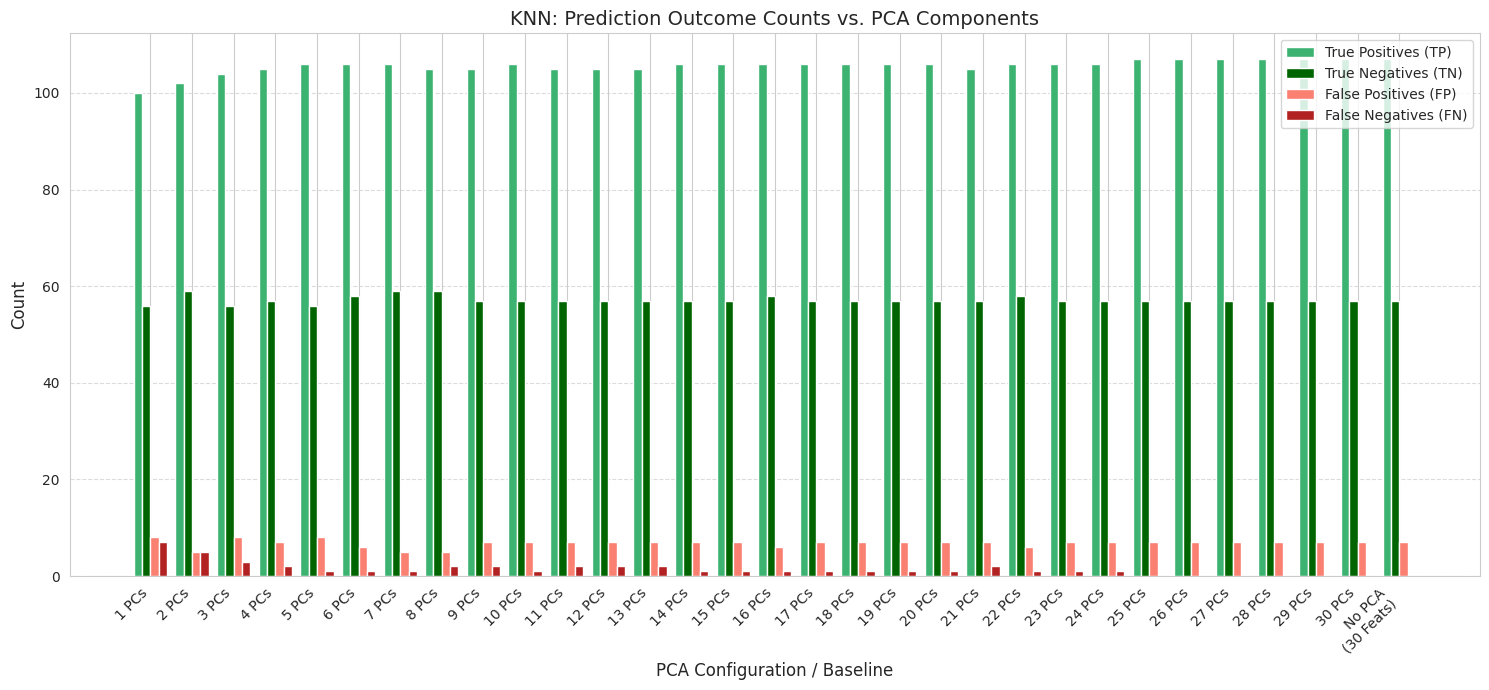

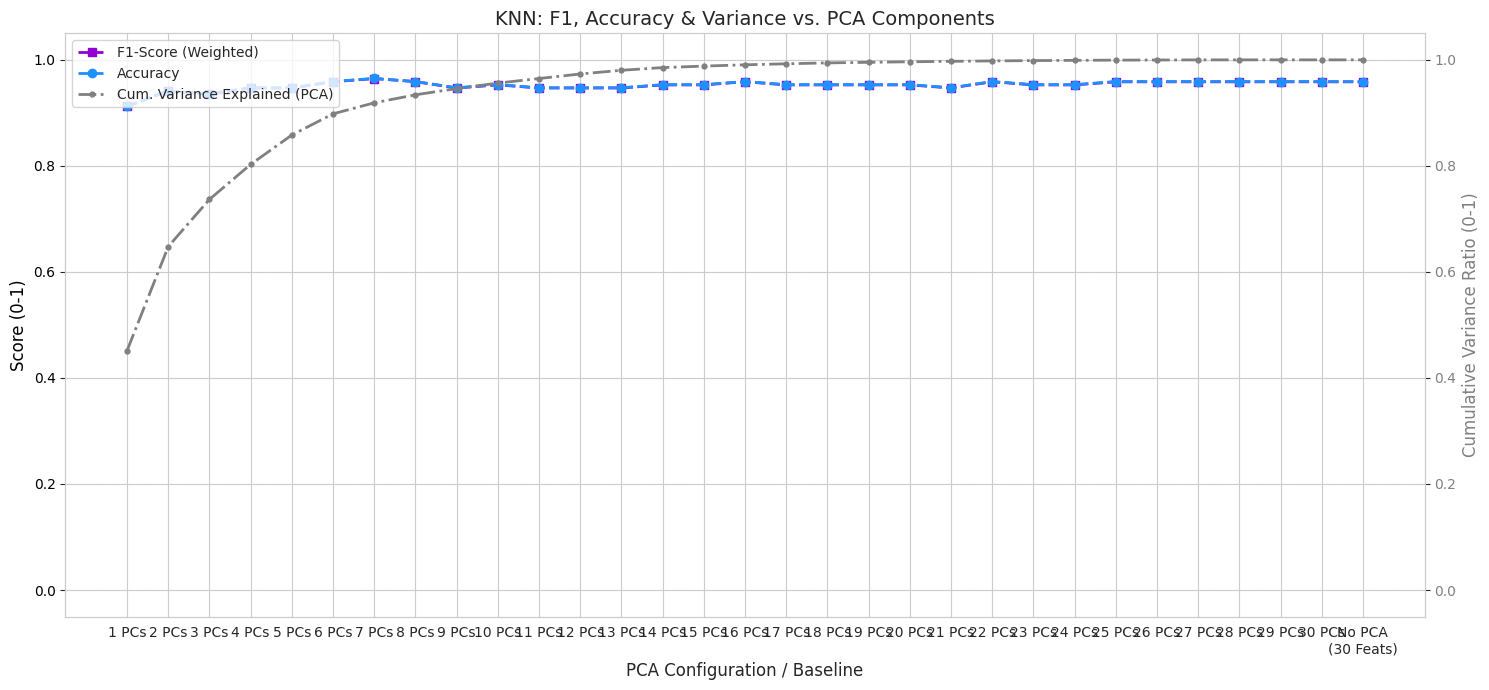

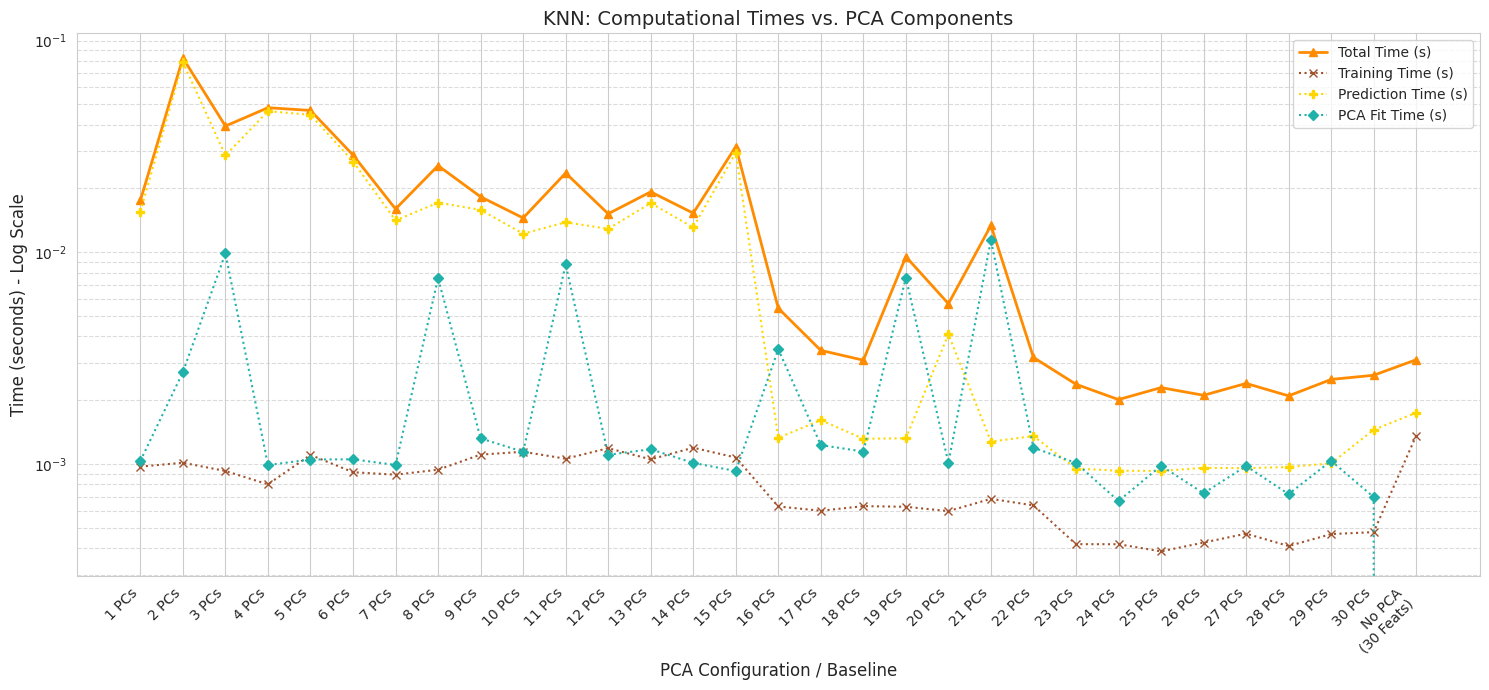


--- Generating plots for: Random Forest ---


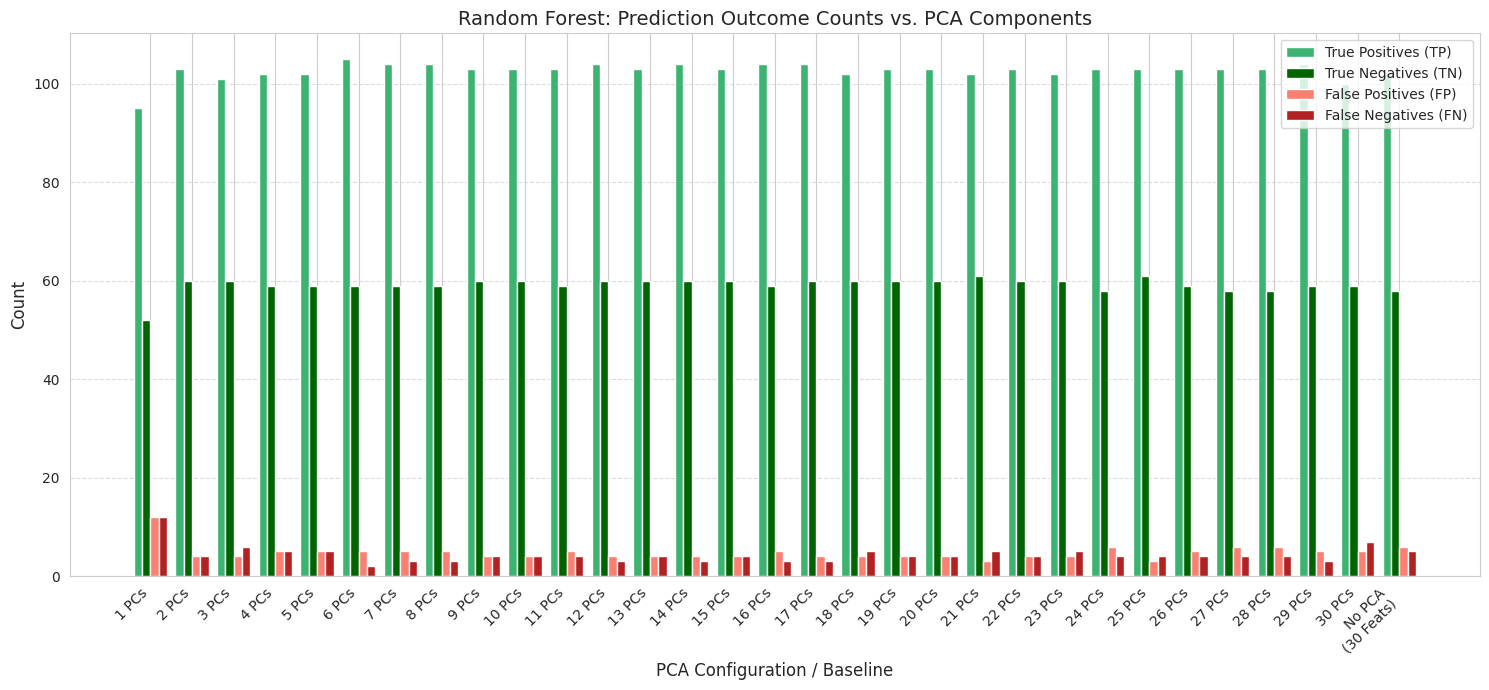

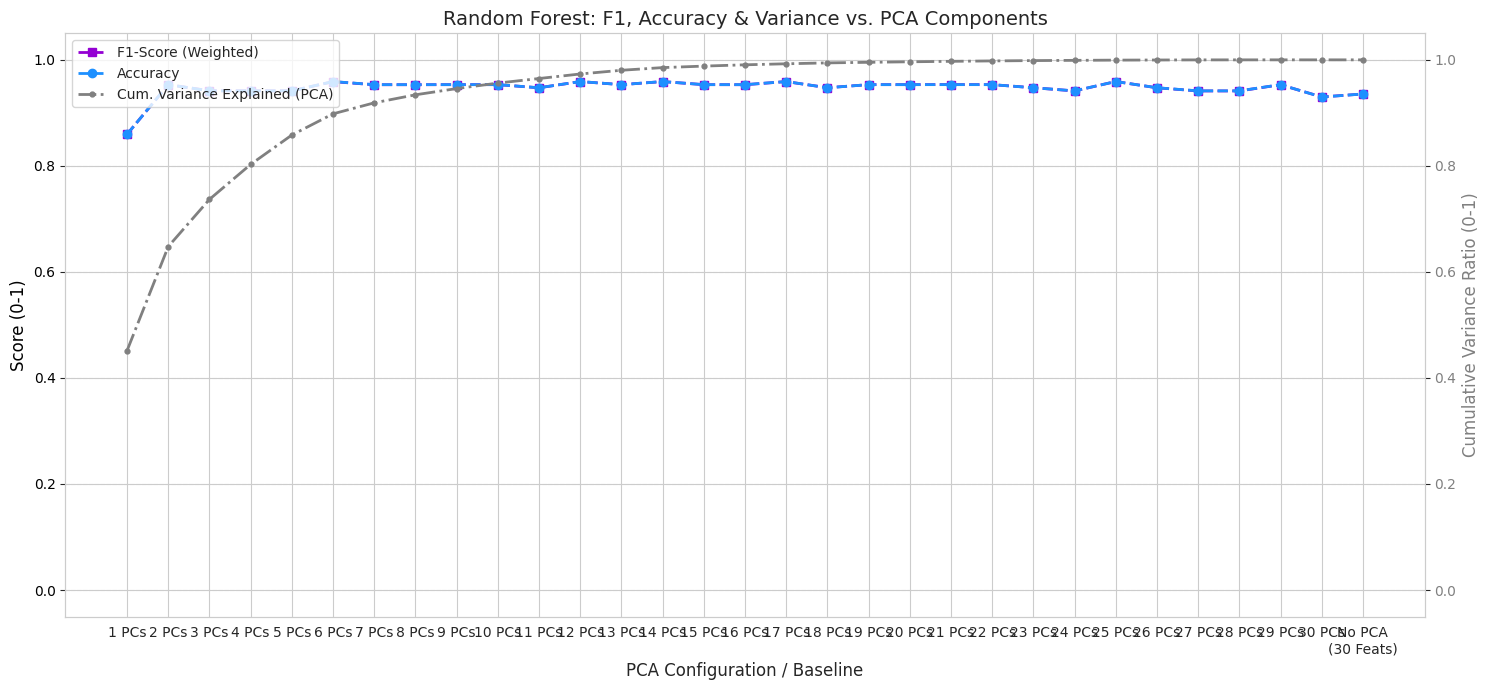

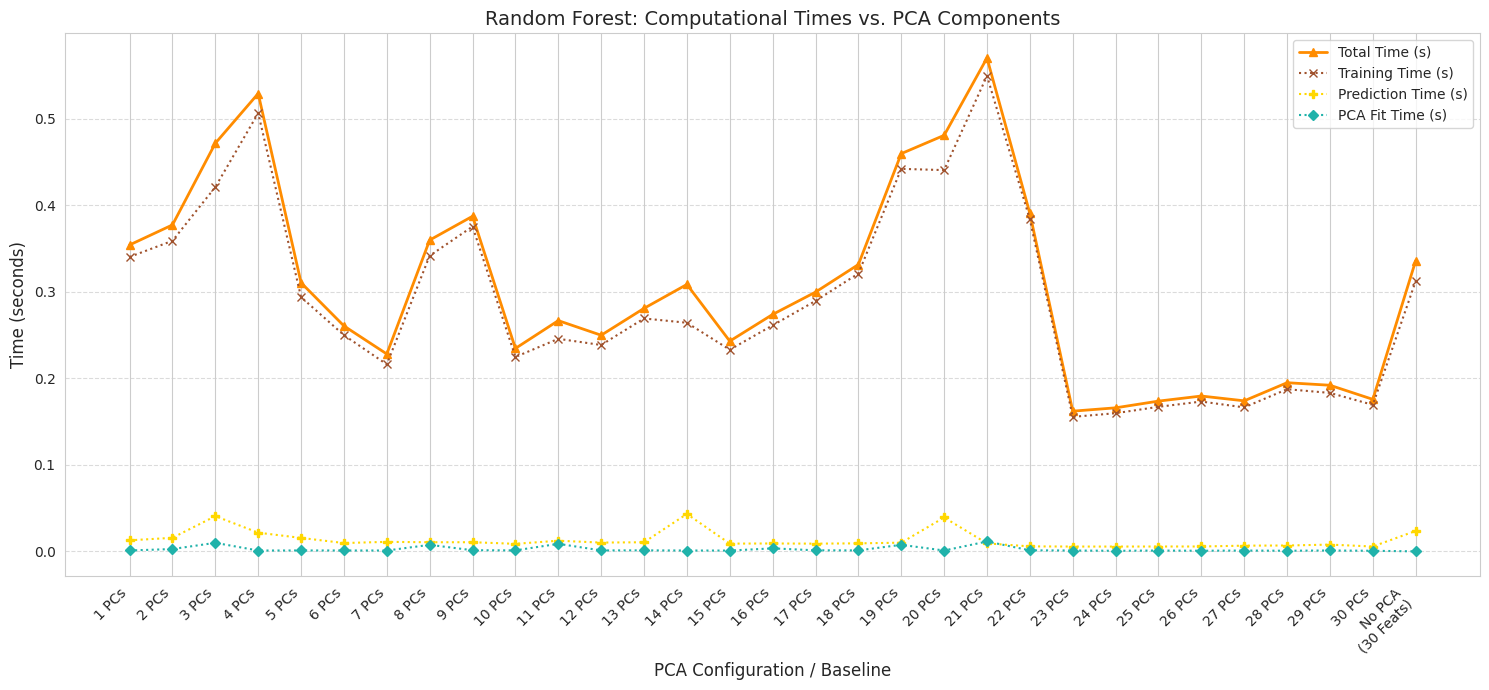


--- Simplified Graphing Complete ---


In [15]:
#old graphs by AI

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported

# --- Ensure results_df is loaded and prepared ---
# if 'results_df' not in locals() and 'results_df' not in globals():
#     results_df = pd.read_csv('your_file.csv') # Load if not already in memory
if 'FP_FN' not in results_df.columns:
    results_df['FP_FN'] = results_df['FP'] + results_df['FN']

print("\n--- Generating Simplified Performance Graphs ---")

# --- Function to prepare data for plotting (PCA ascending, Baseline at end) ---
def prepare_plot_data(full_results_df, classifier_name_str):
    plot_df_classifier = full_results_df[full_results_df['Classifier'] == classifier_name_str].copy()
    baseline_run = plot_df_classifier[plot_df_classifier['Experiment_Type'] == 'Baseline_No_PCA'].copy()
    pca_runs = plot_df_classifier[plot_df_classifier['Experiment_Type'] == 'PCA'].copy()
    pca_runs_sorted_asc = pca_runs.sort_values(by='Num_PCs_Actual', ascending=True)

    if not baseline_run.empty:
        final_df_for_plot = pd.concat([pca_runs_sorted_asc, baseline_run]).reset_index(drop=True)
    else:
        final_df_for_plot = pca_runs_sorted_asc.reset_index(drop=True)

    if final_df_for_plot.empty:
        print(f"No data to plot for {classifier_name_str}.")
        return None, None, None

    x_positions = np.arange(len(final_df_for_plot))
    x_labels = []
    for index, row in final_df_for_plot.iterrows():
        if row['Experiment_Type'] == 'Baseline_No_PCA':
            x_labels.append(f"No PCA\n({row['Num_PCs_Actual']:.0f} Feats)")
        else:
            x_labels.append(f"{row['Num_PCs_Actual']:.0f} PCs")
    return final_df_for_plot, x_positions, x_labels

# --- Iterate through classifiers ---
for classifier_name in results_df['Classifier'].unique():
    print(f"\n--- Generating plots for: {classifier_name} ---")
    plot_data, x_pos, x_tick_labels = prepare_plot_data(results_df, classifier_name)

    if plot_data is None:
        continue

    # --- Plot 1: TP, TN, FP, FN (Grouped Bar Chart) ---
    plt.figure(figsize=(15, 7))
    bar_width = 0.20
    # Calculate positions for each bar in the group
    pos1 = x_pos - 1.5 * bar_width
    pos2 = x_pos - 0.5 * bar_width
    pos3 = x_pos + 0.5 * bar_width
    pos4 = x_pos + 1.5 * bar_width

    plt.bar(pos1, plot_data['TP'], width=bar_width, label='True Positives (TP)', color='mediumseagreen')
    plt.bar(pos2, plot_data['TN'], width=bar_width, label='True Negatives (TN)', color='darkgreen')
    plt.bar(pos3, plot_data['FP'], width=bar_width, label='False Positives (FP)', color='salmon')
    plt.bar(pos4, plot_data['FN'], width=bar_width, label='False Negatives (FN)', color='firebrick')

    plt.xlabel("PCA Configuration / Baseline", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"{classifier_name}: Prediction Outcome Counts vs. PCA Components", fontsize=14)
    plt.xticks(x_pos, x_tick_labels, rotation=45, ha="right", fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- Plot 2: F1-Score, Accuracy, and Cumulative Variance ---
    plt.figure(figsize=(15, 7))
    ax_score = plt.gca() # Get current axes

    ax_score.plot(x_pos, plot_data['F1_Score_Weighted'], color='darkviolet', linestyle='--', marker='s', markersize=6, linewidth=2, label='F1-Score (Weighted)')
    ax_score.plot(x_pos, plot_data['Accuracy'], color='dodgerblue', linestyle='--', marker='o', markersize=6, linewidth=2, label='Accuracy')
    ax_score.set_xlabel("PCA Configuration / Baseline", fontsize=12)
    ax_score.set_ylabel("Score (0-1)", color='black', fontsize=12)
    ax_score.tick_params(axis='y', labelcolor='black')
    ax_score.set_ylim(-0.05, 1.05)
    ax_score.grid(axis='y', linestyle='--', alpha=0.7)

    # Add Cumulative Variance on a secondary y-axis
    ax_variance = ax_score.twinx()
    variance_to_plot = []
    for index, row in plot_data.iterrows():
        if row['Experiment_Type'] == 'PCA':
            variance_to_plot.append(row['Variance_Explained'])
        else: # Baseline
            variance_to_plot.append(1.0) # Representing 100% of original variance
    ax_variance.plot(x_pos, variance_to_plot, color='gray', linestyle='dashdot', marker='.', markersize=7, linewidth=2, label='Cum. Variance Explained (PCA)')
    ax_variance.set_ylabel("Cumulative Variance Ratio (0-1)", color='gray', fontsize=12)
    ax_variance.tick_params(axis='y', labelcolor='gray')
    ax_variance.set_ylim(-0.05, 1.05)

    plt.title(f"{classifier_name}: F1, Accuracy & Variance vs. PCA Components", fontsize=14)
    plt.xticks(x_pos, x_tick_labels, rotation=45, ha="right", fontsize=10)
    # Combine legends from both axes
    lines_score, labels_score = ax_score.get_legend_handles_labels()
    lines_var, labels_var = ax_variance.get_legend_handles_labels()
    ax_variance.legend(lines_score + lines_var, labels_score + labels_var, loc='best', fontsize=10) # 'best' might work well here
    plt.tight_layout()
    plt.show()


    # --- Plot 3: Times (Total, Training, Prediction, PCA Fit) ---
    plt.figure(figsize=(15, 7))
    plt.plot(x_pos, plot_data['Total_Time_s'], color='darkorange', linestyle='-', marker='^', markersize=6, linewidth=2, label='Total Time (s)')
    plt.plot(x_pos, plot_data['Training_Time_s'], color='sienna', linestyle=':', marker='x', markersize=6, linewidth=1.5, label='Training Time (s)')
    plt.plot(x_pos, plot_data['Prediction_Time_s'], color='gold', linestyle=':', marker='P', markersize=6, linewidth=1.5, label='Prediction Time (s)')

    pca_fit_times_to_plot = []
    for idx, row in plot_data.iterrows():
        if row['Experiment_Type'] == 'PCA':
            pca_fit_times_to_plot.append(row['PCA_Fit_Time_s'])
        else:
            pca_fit_times_to_plot.append(0) # Or np.nan for baseline if you don't want to plot a zero
    plt.plot(x_pos, pca_fit_times_to_plot, color='lightseagreen', linestyle=':', marker='D', markersize=5, linewidth=1.5, label='PCA Fit Time (s)')

    plt.xlabel("PCA Configuration / Baseline", fontsize=12)
    plt.ylabel("Time (seconds)", fontsize=12)
    plt.title(f"{classifier_name}: Computational Times vs. PCA Components", fontsize=14)
    # Conditional log scale for y-axis if times vary greatly
    if plot_data['Total_Time_s'].max() > 10 * plot_data['Total_Time_s'].min() and plot_data['Total_Time_s'].min() > 0.000001 : # Check min > 0 for log
        plt.yscale('log')
        plt.ylabel("Time (seconds) - Log Scale", fontsize=12)
    plt.xticks(x_pos, x_tick_labels, rotation=45, ha="right", fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', which='both', alpha=0.7) # 'both' for major and minor ticks on log scale
    plt.tight_layout()
    plt.show()

print("\n--- Simplified Graphing Complete ---")

# Graph Set 4


--- Generating Simplified and Refined Performance Graphs ---

--- Generating plots for: KNN ---


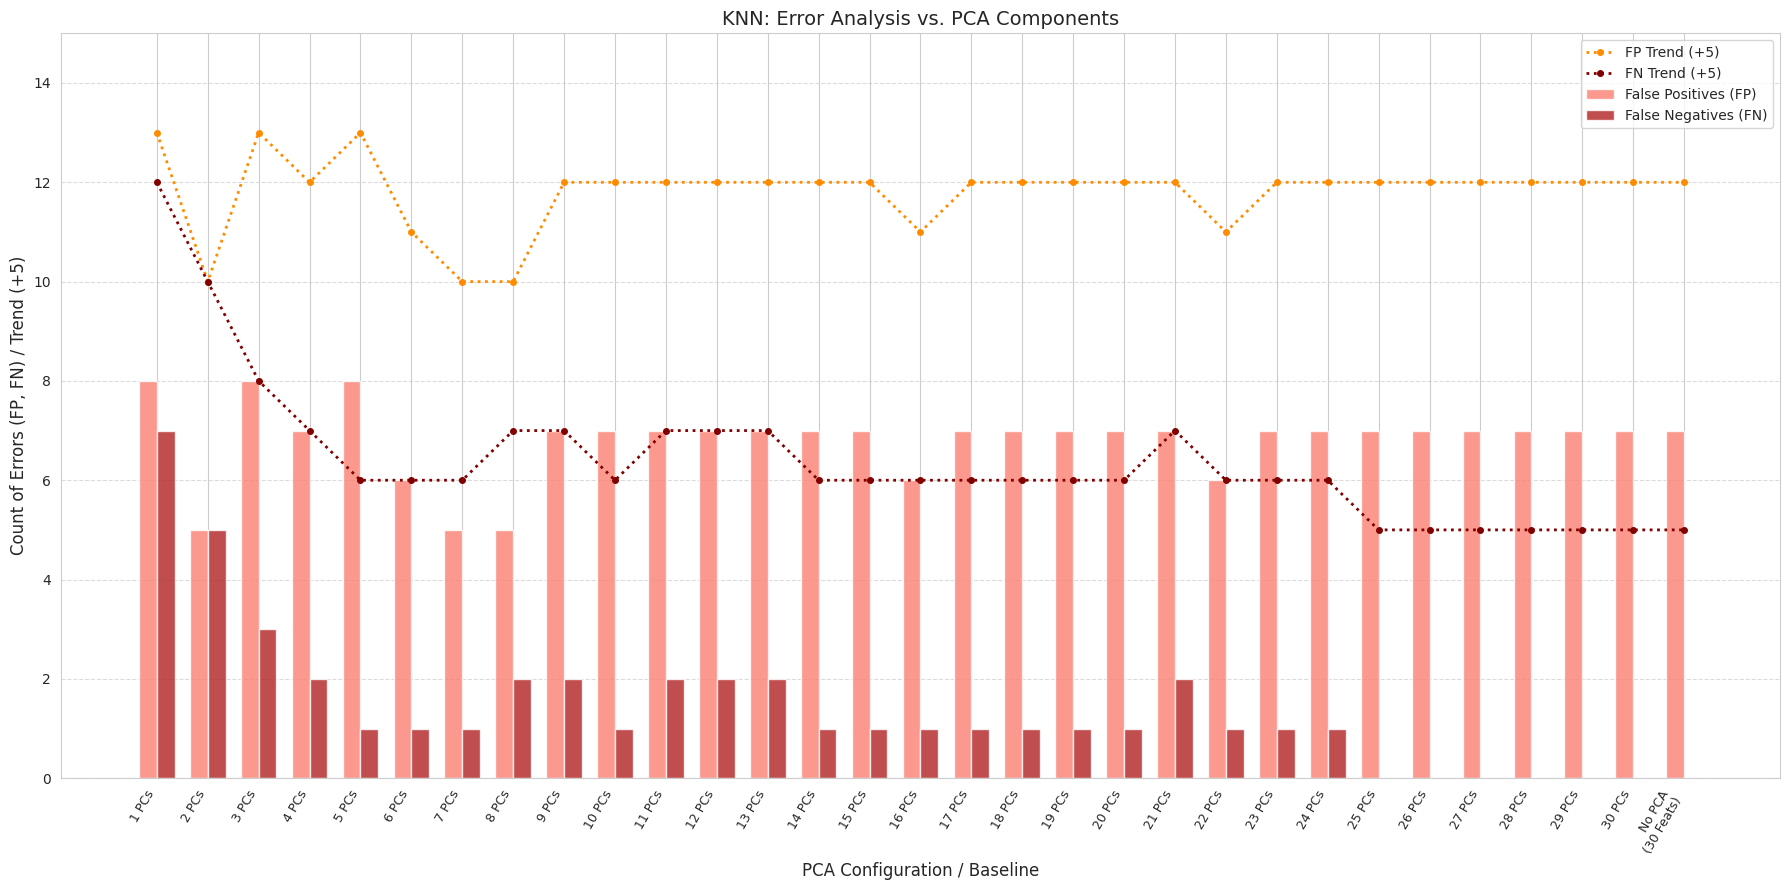

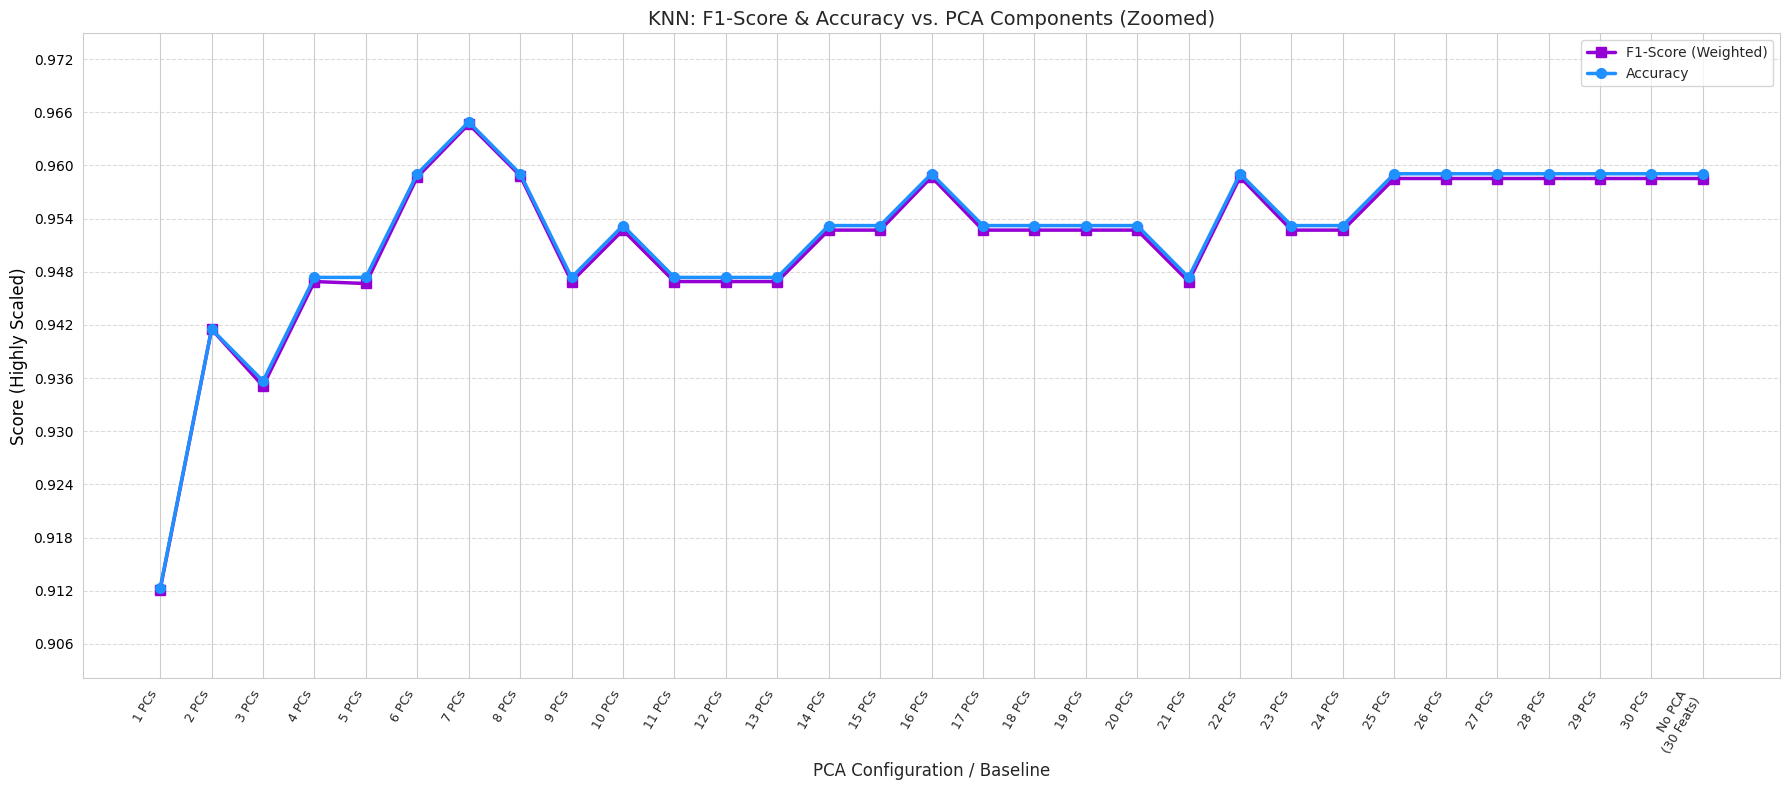

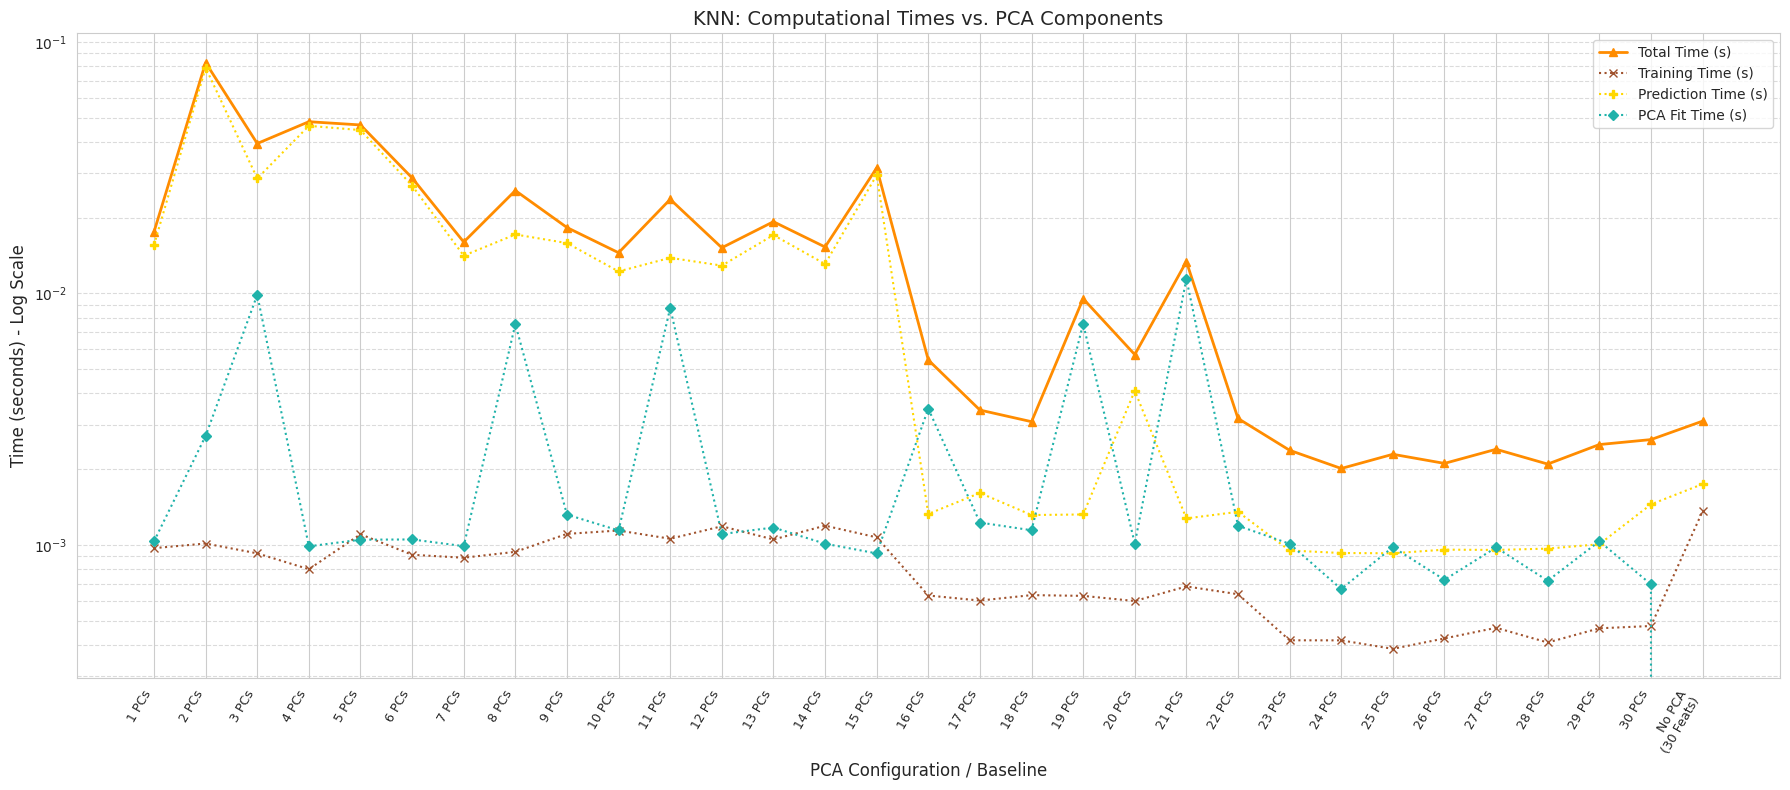


--- Generating plots for: Random Forest ---


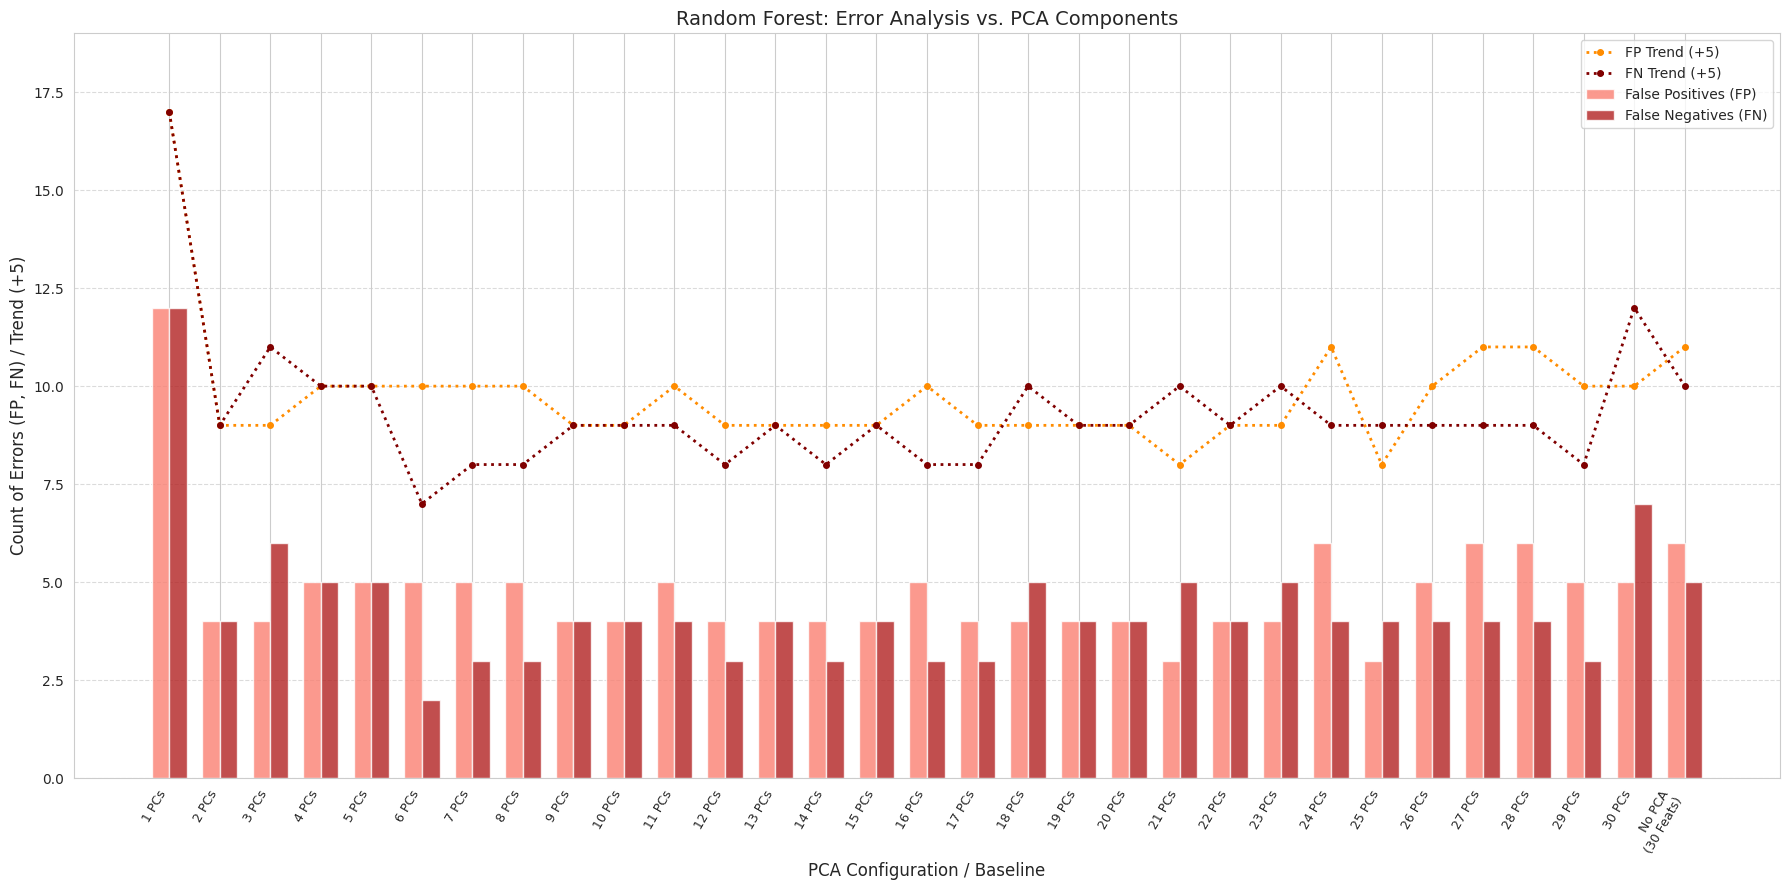

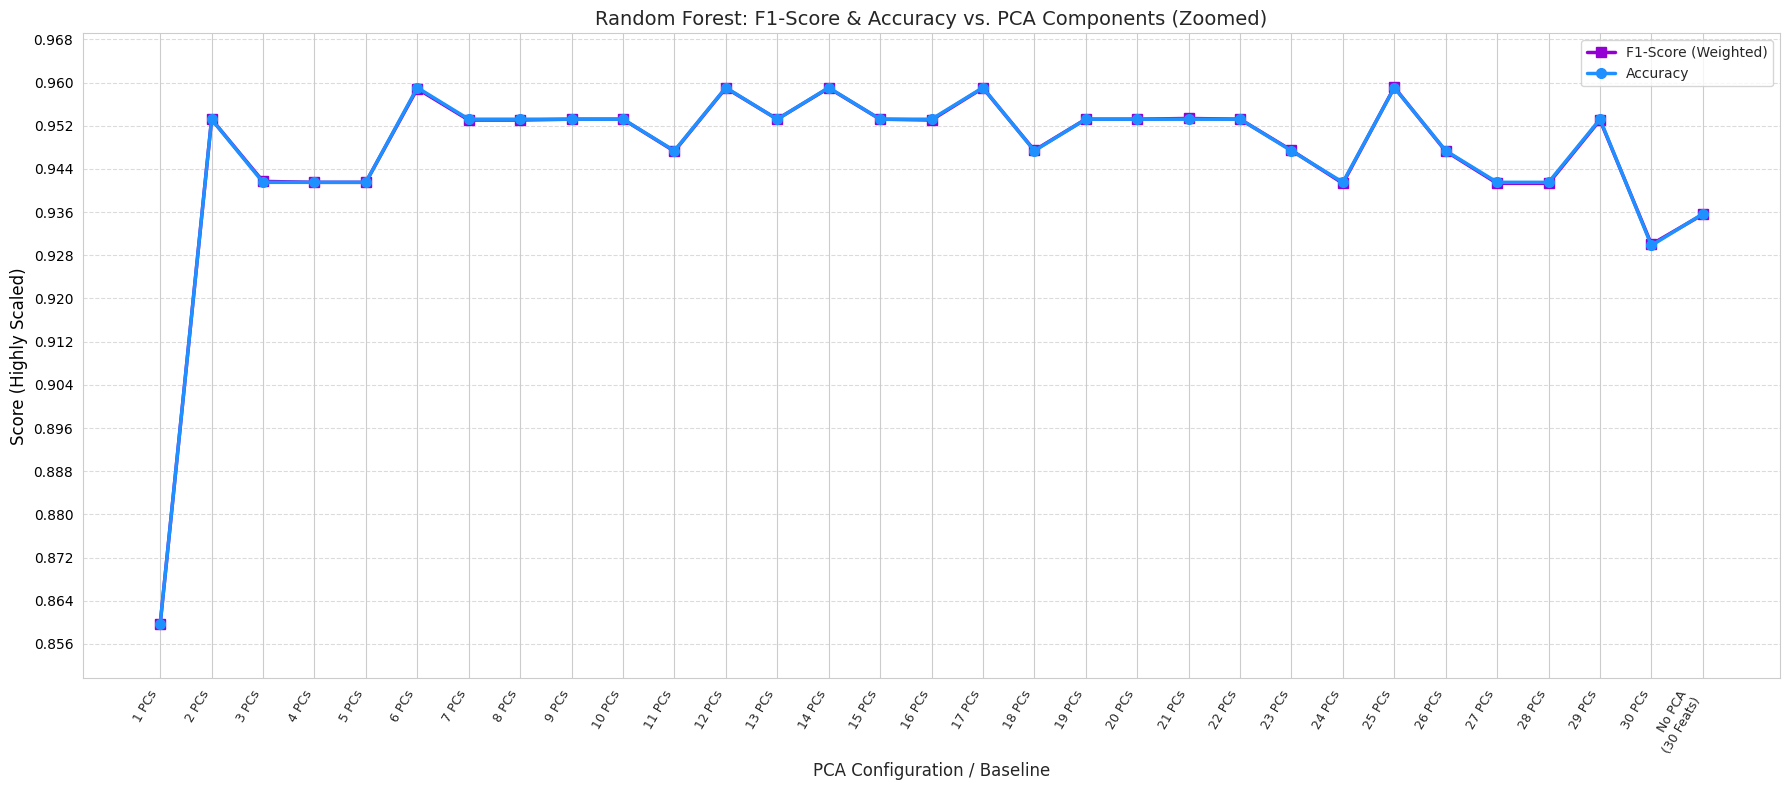

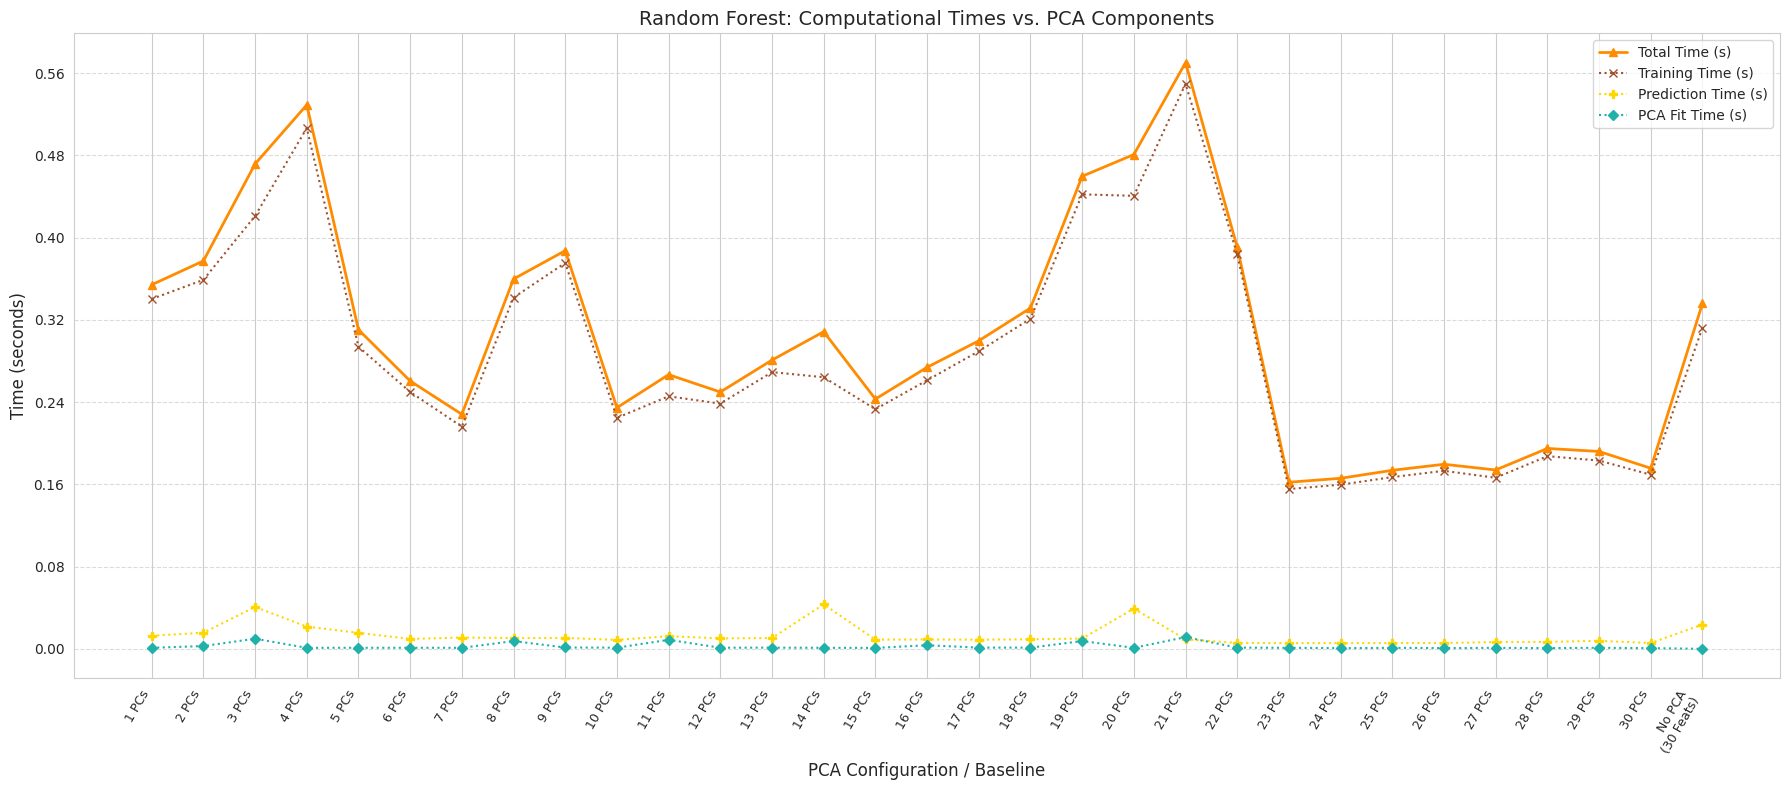


--- Simplified and Refined Graphing Complete ---


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mticker

# --- Ensure results_df is loaded and prepared ---
# if 'results_df' not in locals() and 'results_df' not in globals():
#     results_df = pd.read_csv('your_file.csv')
if 'FP_FN' not in results_df.columns:
    results_df['FP_FN'] = results_df['FP'] + results_df['FN']

print("\n--- Generating Simplified and Refined Performance Graphs ---")

# --- Function to prepare data for plotting (PCA ascending, Baseline at end) ---
def prepare_plot_data_simple(full_results_df, classifier_name_str):
    plot_df_classifier = full_results_df[full_results_df['Classifier'] == classifier_name_str].copy()
    baseline_run = plot_df_classifier[plot_df_classifier['Experiment_Type'] == 'Baseline_No_PCA'].copy()
    pca_runs = plot_df_classifier[plot_df_classifier['Experiment_Type'] == 'PCA'].copy()

    # Sort PCA runs by Num_PCs_Actual in ASCENDING order
    pca_runs_sorted_asc = pca_runs.sort_values(by='Num_PCs_Actual', ascending=True)

    # Combine them: PCA runs first, then baseline at the end
    if not baseline_run.empty:
        # For the baseline, its 'Num_PCs_Actual' is the original feature count.
        # We'll handle its label specifically.
        final_df_for_plot = pd.concat([pca_runs_sorted_asc, baseline_run]).reset_index(drop=True)
    else:
        final_df_for_plot = pca_runs_sorted_asc.reset_index(drop=True)

    if final_df_for_plot.empty:
        print(f"No data to plot for {classifier_name_str}.")
        return None, None, None

    # X-axis positions are just sequential integers for the points we have
    x_positions = np.arange(len(final_df_for_plot))
    x_labels = []
    for index, row in final_df_for_plot.iterrows():
        if row['Experiment_Type'] == 'Baseline_No_PCA':
            x_labels.append(f"No PCA\n({row['Num_PCs_Actual']:.0f} Feats)")
        else:
            x_labels.append(f"{row['Num_PCs_Actual']:.0f} PCs") # Label with actual PCs used
    return final_df_for_plot, x_positions, x_labels

# --- Iterate through classifiers ---
for classifier_name in results_df['Classifier'].unique():
    print(f"\n--- Generating plots for: {classifier_name} ---")
    plot_data, x_plot_indices, x_plot_labels = prepare_plot_data_simple(results_df, classifier_name)

    if plot_data is None:
        continue

    # --- Plot 1: FP and FN Bar Chart (Elevated Trend Lines Optional) ---
    plt.figure(figsize=(18, 9))
    bar_width = 0.35
    pos_fp = x_plot_indices - bar_width/2
    pos_fn = x_plot_indices + bar_width/2

    plt.bar(pos_fp, plot_data['FP'], width=bar_width, label='False Positives (FP)', color='salmon', alpha=0.8)
    plt.bar(pos_fn, plot_data['FN'], width=bar_width, label='False Negatives (FN)', color='firebrick', alpha=0.8)

    # OPTIONAL: Elevated Trend Lines for FP & FN
    add_trend_lines_fp_fn = True # Set to False if you don't want them
    if add_trend_lines_fp_fn:
        elevation_offset = 5 # Adjust if your error counts are very small or large
        # Ensure elevation doesn't make values negative if errors are small
        fp_trend_data = plot_data['FP'] + elevation_offset
        fn_trend_data = plot_data['FN'] + elevation_offset

        plt.plot(x_plot_indices, fp_trend_data, color='darkorange', linestyle=':', marker='.', markersize=8, linewidth=2, label=f'FP Trend (+{elevation_offset})')
        plt.plot(x_plot_indices, fn_trend_data, color='maroon', linestyle=':', marker='.', markersize=8, linewidth=2, label=f'FN Trend (+{elevation_offset})')
        y_label_errors = f"Count of Errors (FP, FN) / Trend (+{elevation_offset})"
    else:
        y_label_errors = "Count of Errors (FP, FN)"


    plt.xlabel("PCA Configuration / Baseline", fontsize=12)
    plt.ylabel(y_label_errors, fontsize=12)
    plt.title(f"{classifier_name}: Error Analysis vs. PCA Components", fontsize=14)
    plt.xticks(x_plot_indices, x_plot_labels, rotation=60, ha="right", fontsize=9)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    max_fp_val = plot_data['FP'].max(skipna=True) if not plot_data['FP'].empty else 0
    max_fn_val = plot_data['FN'].max(skipna=True) if not plot_data['FN'].empty else 0
    max_bar_height = max(max_fp_val, max_fn_val)

    if add_trend_lines_fp_fn:
        plot_upper_limit = max_bar_height + elevation_offset
    else:
        plot_upper_limit = max_bar_height

    if pd.notna(plot_upper_limit) and plot_upper_limit > 0 :
         plt.ylim(0, plot_upper_limit + (5 if not add_trend_lines_fp_fn else 2)) # Smaller padding if trend lines are high
    else:
         plt.ylim(0, 10 + (elevation_offset if add_trend_lines_fp_fn else 0))
    plt.tight_layout()
    plt.show()


    # --- Plot 2: F1-Score and Accuracy (Zoomed Y-Axis, No CumVar) ---
    plt.figure(figsize=(18, 8))
    ax_score = plt.gca()

    ax_score.plot(x_plot_indices, plot_data['F1_Score_Weighted'], color='darkviolet', linestyle='-', marker='s', markersize=7, linewidth=2.5, label='F1-Score (Weighted)')
    ax_score.plot(x_plot_indices, plot_data['Accuracy'], color='dodgerblue', linestyle='-', marker='o', markersize=7, linewidth=2.5, label='Accuracy')

    ax_score.set_xlabel("PCA Configuration / Baseline", fontsize=12)
    ax_score.set_ylabel("Score (Highly Scaled)", color='black', fontsize=12)
    ax_score.tick_params(axis='y', labelcolor='black', labelsize=10)

    min_y_val_scores = min(plot_data['F1_Score_Weighted'].min(skipna=True), plot_data['Accuracy'].min(skipna=True))
    max_y_val_scores = max(plot_data['F1_Score_Weighted'].max(skipna=True), plot_data['Accuracy'].max(skipna=True))

    if pd.isna(min_y_val_scores): min_y_val_scores = 0.7 # Default if no data
    if pd.isna(max_y_val_scores): max_y_val_scores = 1.0 # Default if no data

    y_axis_min_score = max(0.7, min_y_val_scores - 0.01) # Start at 0.7 or slightly below min
    y_axis_max_score = min(1.0, max_y_val_scores + 0.01) # Go slightly above max, capped at 1.0
    if y_axis_min_score >= y_axis_max_score : # Ensure valid range
        y_axis_min_score = max_y_val_scores - 0.02 if max_y_val_scores > 0.02 else 0.0
        y_axis_max_score = max_y_val_scores + 0.005 if max_y_val_scores < 0.995 else 1.0
        if y_axis_min_score >= y_axis_max_score : y_axis_min_score = 0.7 # Fallback

    ax_score.set_ylim(y_axis_min_score, y_axis_max_score)

    # Y-axis ticks with smaller increments
    score_range = y_axis_max_score - y_axis_min_score
    # Aim for about 5-10 ticks in the zoomed range
    num_desired_ticks_score = max(5, int(score_range / 0.005) if score_range > 0.005 else 5) # Avoid too many ticks if range is tiny
    num_desired_ticks_score = min(num_desired_ticks_score, 15) # Cap ticks

    ax_score.yaxis.set_major_locator(mticker.MaxNLocator(nbins=num_desired_ticks_score, prune='both'))
    ax_score.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))


    ax_score.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f"{classifier_name}: F1-Score & Accuracy vs. PCA Components (Zoomed)", fontsize=14)
    plt.xticks(x_plot_indices, x_plot_labels, rotation=60, ha="right", fontsize=9)
    ax_score.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.show()


    # --- Plot 3: Times (Total, Training, Prediction, PCA Fit) ---
    plt.figure(figsize=(18, 8))
    plt.plot(x_plot_indices, plot_data['Total_Time_s'], color='darkorange', linestyle='-', marker='^', markersize=6, linewidth=2, label='Total Time (s)')
    plt.plot(x_plot_indices, plot_data['Training_Time_s'], color='sienna', linestyle=':', marker='x', markersize=6, linewidth=1.5, label='Training Time (s)')
    plt.plot(x_plot_indices, plot_data['Prediction_Time_s'], color='gold', linestyle=':', marker='P', markersize=6, linewidth=1.5, label='Prediction Time (s)')

    pca_fit_values_for_plot = plot_data['PCA_Fit_Time_s'].fillna(0).tolist()
    plt.plot(x_plot_indices, pca_fit_values_for_plot, color='lightseagreen', linestyle=':', marker='D', markersize=5, linewidth=1.5, label='PCA Fit Time (s)')

    plt.xlabel("PCA Configuration / Baseline", fontsize=12)
    plt.ylabel("Time (seconds)", fontsize=12)
    plt.title(f"{classifier_name}: Computational Times vs. PCA Components", fontsize=14)

    min_time_val = plot_data['Total_Time_s'].min(skipna=True)
    max_time_val = plot_data['Total_Time_s'].max(skipna=True)
    if pd.notna(min_time_val) and pd.notna(max_time_val) and min_time_val > 0 and max_time_val > 10 * min_time_val :
        plt.yscale('log')
        plt.ylabel("Time (seconds) - Log Scale", fontsize=12)
        plt.grid(axis='y', linestyle='--', which='both', alpha=0.7) # Grid for log scale
    else:
        # Set linear y-ticks for time if not log scale
        current_ax_time = plt.gca()
        time_plot_upper_limit = max_time_val if pd.notna(max_time_val) else 0.1
        num_y_ticks_time = 10
        current_ax_time.yaxis.set_major_locator(mticker.MaxNLocator(nbins=num_y_ticks_time, prune='both'))
        plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid for linear scale


    plt.xticks(x_plot_indices, x_plot_labels, rotation=60, ha="right", fontsize=9)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

print("\n--- Simplified and Refined Graphing Complete ---")